<a href="https://colab.research.google.com/github/ThierrryScotto/trabalho_pratico/blob/main/heat_and_heart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Bibliotecas

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [65]:
url = 'https://raw.githubusercontent.com/ThierrryScotto/trabalho_pratico/refs/heads/main/datasets/datasets_prontos/dataset_with_geographic_data.csv'

dataset = pd.read_csv(url)

dataset

date    heat_index  standard_deviation  mean_temperature  \
0    2000-12     30.079677            4.615565             28.94   
1    2001-01     31.907742            4.864888             29.69   
2    2001-02     32.959643            3.889432             30.08   
3    2001-03     32.071290            3.585808             29.82   
4    2001-04     25.963667            3.307106             25.37   
..       ...           ...                 ...               ...   
272  2023-08     22.680968            5.464467             22.86   
273  2023-09  23058.000000            5.559752             22.70   
274  2023-10     23.510645            3.787990             23.30   
275  2023-11  26595.000000            3.669000             25.96   
276  2023-12     32.380645            6.370596             29.62   

     mean_humidity  mean_wind_speed  max_temperature  min_temperature  \
0            51.32             2.00             35.4             22.2   
1            59.10             2.19             35.4             21.4   
2            60.14             2.33             34.2             23.5   
3            56.61             2.21             34.4             25.1   
4            64.77             1.68             30.8             19.3   
..             ...              ...              ...              ...   
272          52.13             1.62             32.3             15.2   
273          69.97             1.69             34.9             15.6   
274          63.58             1.84             31.6             16.9   
275          61.17             1.65             33.5             19.9   
276          58.16             1.80             37.9             21.1   

     sum_heat_index  percentil_95  ...  lag_heat_index_2  lag_heat_index_3  \
0            932.47      38025.00  ...         23.427742         21.801111   
1            989.14         38.78  ...         26.305667         23.427742   
2            922.87      38625.00  ...         30.079677         26.305667   
3            994.21      37065.00  ...         31.907742         30.079677   
4            778.91      30751.00  ...         32.959643         31.907742   
..              ...           ...  ...               ...               ...   
272          703.11      31335.00  ...      21014.000000         23.174194   
273          691.74         33.46  ...         19.769677      21014.000000   
274          728.83      29465.00  ...         22.680968         19.769677   
275          797.85      31954.00  ...      23058.000000         22.680968   
276         1003.80         42.35  ...         23.510645      23058.000000   

     hospitalizations  average_stay  deaths  mortality_rate  deforestation  \
0                4266           6.1     242            5.67           6164   
1                4032           5.9     218            5.41           6390   
2                3888           5.8     217            5.58           6390   
3                3658           5.8     176            4.81           6390   
4                4022           5.8     256            6.36           6390   
..                ...           ...     ...             ...            ...   
272              3768           6.9     344            9.13           8843   
273              3606           6.9     329            9.12           8843   
274              3697           7.5     341            9.22           8843   
275              3543           7.3     342            9.65           8843   
276              3424           7.2     270            7.89           8843   

     primary_forest_loss   favela  urbanized_area  
0                     150    1865           14831  
1                     201    1903           14972  
2                     201    1903           14972  
3                     201    1903           14972  
4                     201    1903           14972  
..                    ...     ...             ...  
272                    12    2133           16874  
273                    1

In [66]:
dataset["date"] = pd.to_datetime(dataset["date"], format="%Y-%m")
dataset = dataset.set_index("date")

dataset

heat_index  standard_deviation  mean_temperature  mean_humidity  \
date                                                                            
2000-12-01     30.079677            4.615565             28.94          51.32   
2001-01-01     31.907742            4.864888             29.69          59.10   
2001-02-01     32.959643            3.889432             30.08          60.14   
2001-03-01     32.071290            3.585808             29.82          56.61   
2001-04-01     25.963667            3.307106             25.37          64.77   
...                  ...                 ...               ...            ...   
2023-08-01     22.680968            5.464467             22.86          52.13   
2023-09-01  23058.000000            5.559752             22.70          69.97   
2023-10-01     23.510645            3.787990             23.30          63.58   
2023-11-01  26595.000000            3.669000             25.96          61.17   
2023-12-01     32.380645            6.370596             29.62          58.16   

            mean_wind_speed  max_temperature  min_temperature  sum_heat_index  \
date                                                                            
2000-12-01             2.00             35.4             22.2          932.47   
2001-01-01             2.19             35.4             21.4          989.14   
2001-02-01             2.33             34.2             23.5          922.87   
2001-03-01             2.21             34.4             25.1          994.21   
2001-04-01             1.68             30.8             19.3          778.91   
...                     ...              ...              ...             ...   
2023-08-01             1.62             32.3             15.2          703.11   
2023-09-01             1.69             34.9             15.6          691.74   
2023-10-01             1.84             31.6             16.9          728.83   
2023-11-01             1.65             33.5             19.9          797.85   
2023-12-01             1.80             37.9             21.1         1003.80   

            percentil_95  percentil_99  ...  lag_heat_index_2  \
date                                    ...                     
2000-12-01      38025.00    38552.0000  ...         23.427742   
2001-01-01         38.78       39.5900  ...         26.305667   
2001-02-01      38625.00    38803.0000  ...         30.079677   
2001-03-01      37065.00       37.7400  ...         31.907742   
2001-04-01      30751.00       32.1117  ...         32.959643   
...                  ...           ...  ...               ...   
2023-08-01      31335.00    33002.0000  ...      21014.000000   
2023-09-01         33.46       36.6514  ...         19.769677   
2023-10-01      29465.00    32166.0000  ...         22.680968   
2023-11-01      31954.00       34.2029  ...      23058.000000   
2023-12-01         42.35    44738.0000  ...         23.510645   

            lag_heat_index_3  hospitalizations  average_stay  deaths  \
date                                                                   
2000-12-01         21.801111              4266           6.1     242   
2001-01-01         23.427742              4032           5.9     218   
2001-02-01         26.305667              3888           5.8     217   
2001-03-01         30.079677              3658           5.8     176   
2001-04-01         31.907742              4022           5.8     256   
...                      ...               ...           ...     ...   
2023-08-01         23.174194              3768           6.9     344   
2023-09-01      21014.000000              3606           6.9     329   
2023-10-01         19.769677              3697           7.5     341   
2023-11-01         22.680968              3543           7.3     342   
2023-12-01      23058.000000              3424           7.2     270   

            mortality_rate  deforestation  primary_forest_loss   favela  \
date                                            

# EDA

## Contantes

In [67]:
features = dataset.columns[1:]

features

Index(['standard_deviation', 'mean_temperature', 'mean_humidity',
       'mean_wind_speed', 'max_temperature', 'min_temperature',
       'sum_heat_index', 'percentil_95', 'percentil_99', 'lag_heat_index_1',
       'lag_heat_index_2', 'lag_heat_index_3', 'hospitalizations',
       'average_stay', 'deaths', 'mortality_rate', 'deforestation',
       'primary_forest_loss ', 'favela', 'urbanized_area'],
      dtype='object')

In [68]:
features_inmet = ['heat_index', 'standard_deviation', 'mean_temperature',
       'mean_humidity', 'mean_wind_speed', 'max_temperature',
       'min_temperature', 'sum_heat_index', 'percentil_95', 'percentil_99',
       'lag_heat_index_1', 'lag_heat_index_2', 'lag_heat_index_3']

features

Index(['standard_deviation', 'mean_temperature', 'mean_humidity',
       'mean_wind_speed', 'max_temperature', 'min_temperature',
       'sum_heat_index', 'percentil_95', 'percentil_99', 'lag_heat_index_1',
       'lag_heat_index_2', 'lag_heat_index_3', 'hospitalizations',
       'average_stay', 'deaths', 'mortality_rate', 'deforestation',
       'primary_forest_loss ', 'favela', 'urbanized_area'],
      dtype='object')

In [69]:
features_datasus = ['hospitalizations', 'average_stay', 'deaths', 'mortality_rate']

features_datasus

['hospitalizations', 'average_stay', 'deaths', 'mortality_rate']

In [70]:
features_map_biomas = ['deforestation', 'primary_forest_loss ', 'favela', 'urbanized_area']

features_map_biomas

['deforestation', 'primary_forest_loss ', 'favela', 'urbanized_area']

## Funções

In [71]:
def plot(x, y, title, x_label, y_label, rotation=45, figsize=(15, 4)):
    plt.figure(figsize=figsize)
    plt.plot(x, y, label=y_label)
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.grid(True)
    plt.legend()
    plt.xticks(rotation=rotation)
    plt.tight_layout()
    plt.show()

In [72]:
def scatter_plot(x, y, title, x_label, y_label, rotation=45, figsize=(15, 6)):
    plt.figure(figsize=figsize)
    plt.scatter(x, y)
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.xticks(rotation=rotation)
    plt.show()

In [73]:
def boxplot(x, labels, title, y_label, rotation=None, figsize=(15, 6)):
    plt.figure(figsize=figsize)
    plt.boxplot(x, labels=labels)
    plt.title(title)
    plt.ylabel(y_label)
    plt.xticks(rotation=rotation) if rotation else None
    plt.show()

In [74]:
def bar(x, y, title, x_label, y_label, rotation=45, figsize=(15, 4)):
    plt.figure(figsize=figsize)
    plt.bar(x, y, label=y_label)
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.grid(True)
    plt.legend()
    plt.xticks(rotation=rotation)
    plt.tight_layout()
    plt.show()

## Exploração e visualização de dados

### Plot features meteorológicas

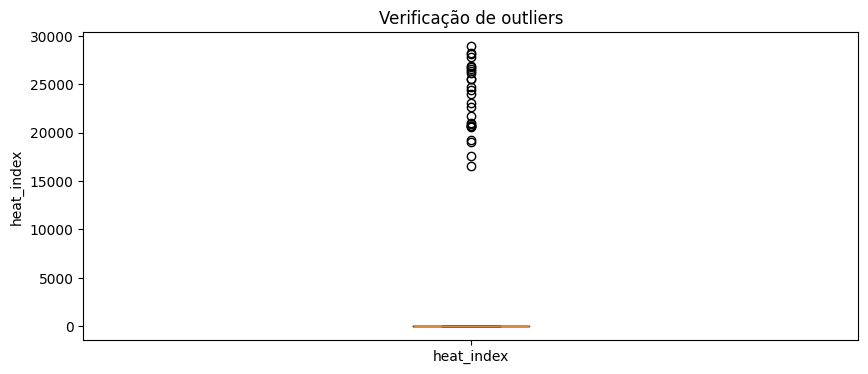

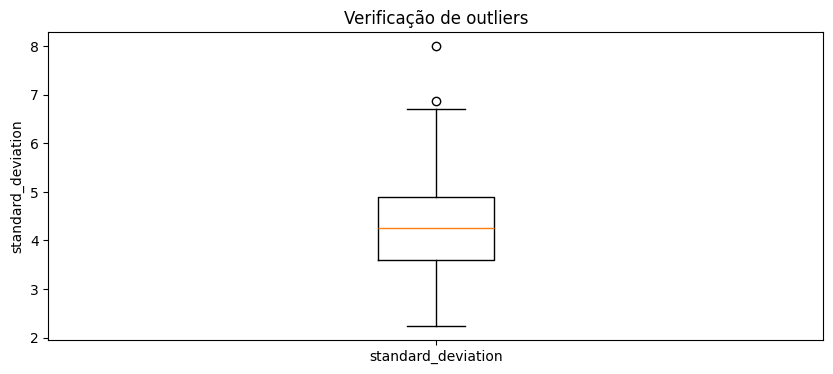

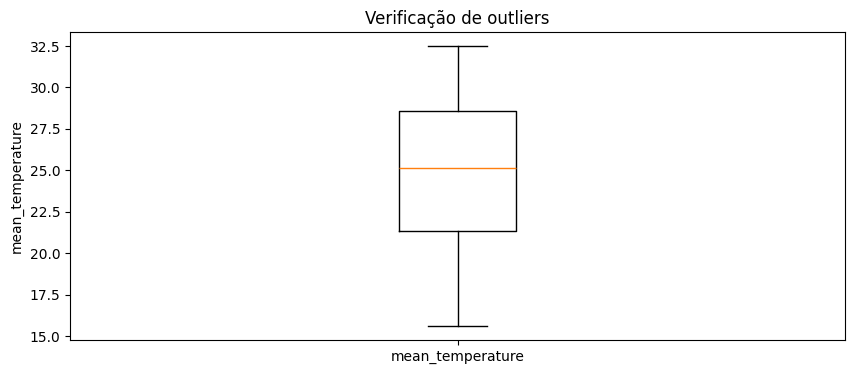

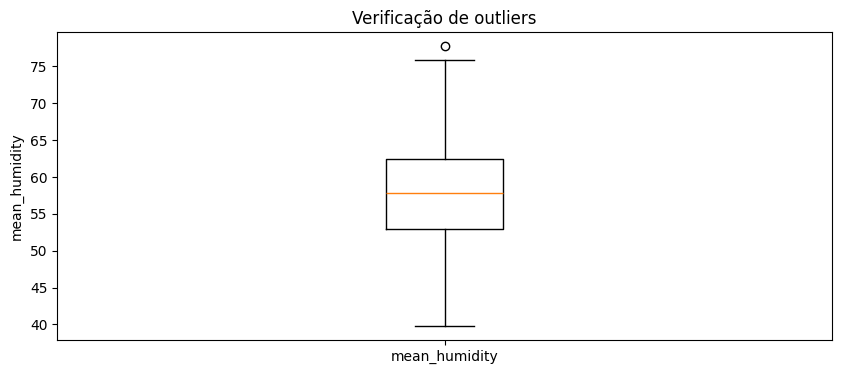

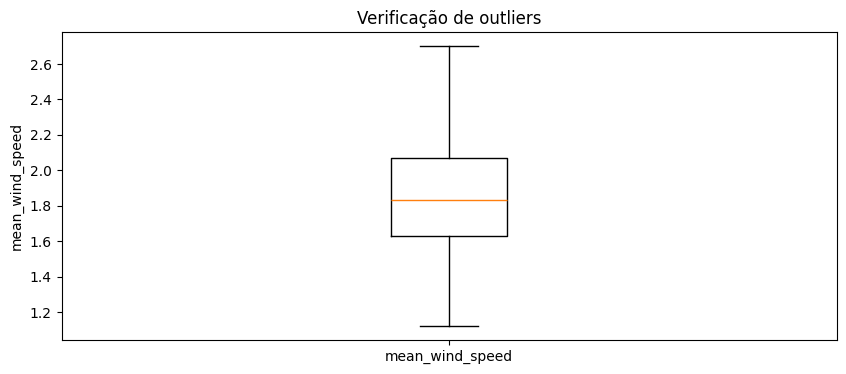

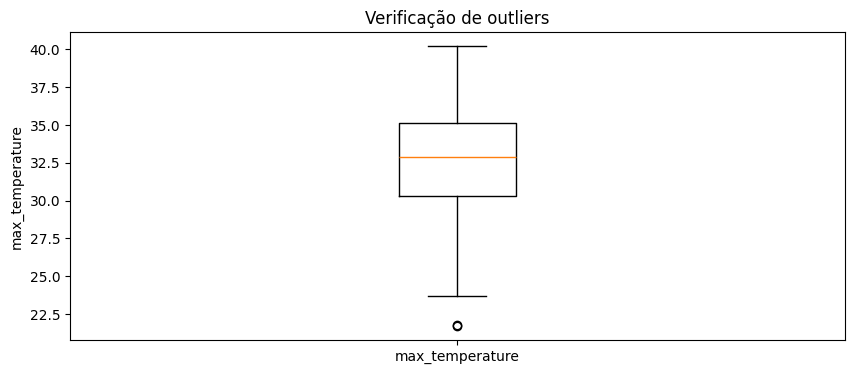

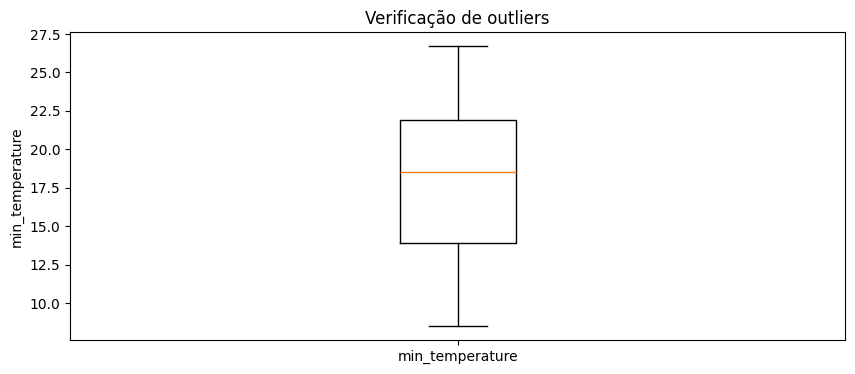

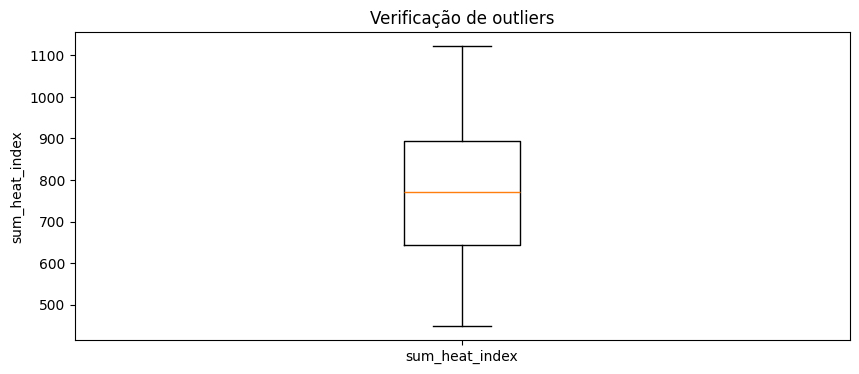

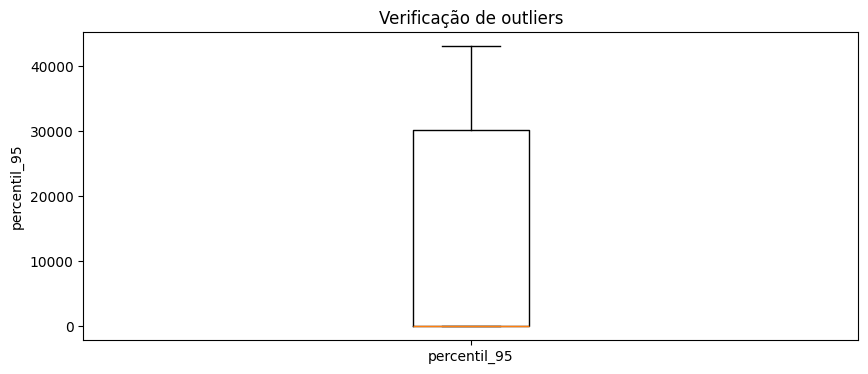

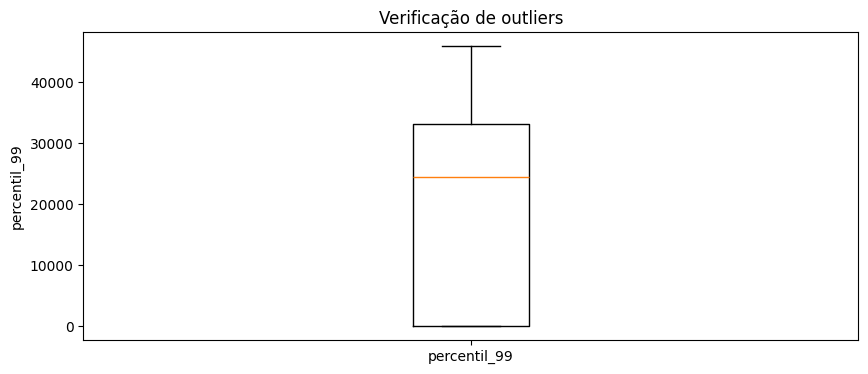

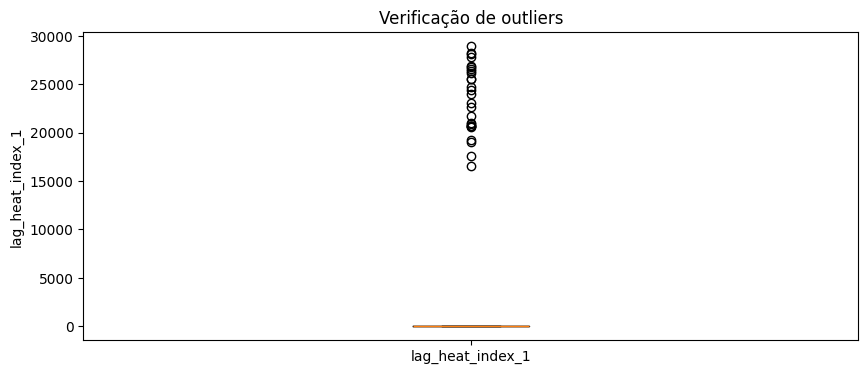

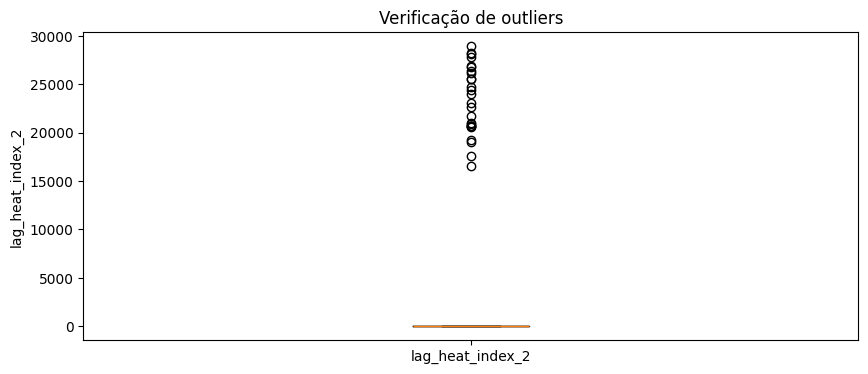

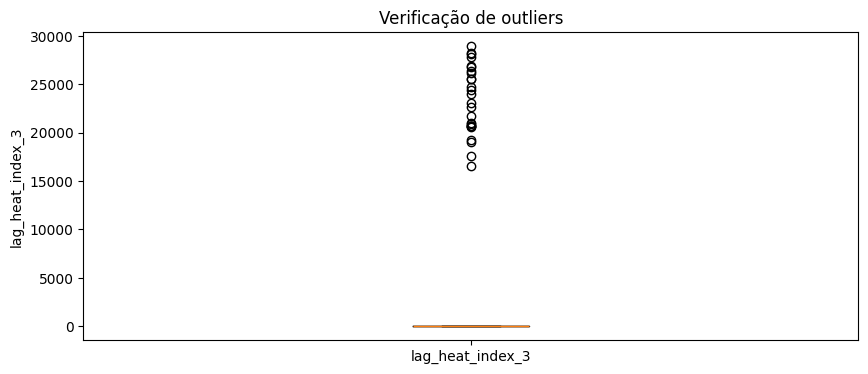

In [75]:
for feature in features_inmet:
    boxplot(dataset[feature], [feature], "Verificação de outliers", feature, figsize=(10, 4))

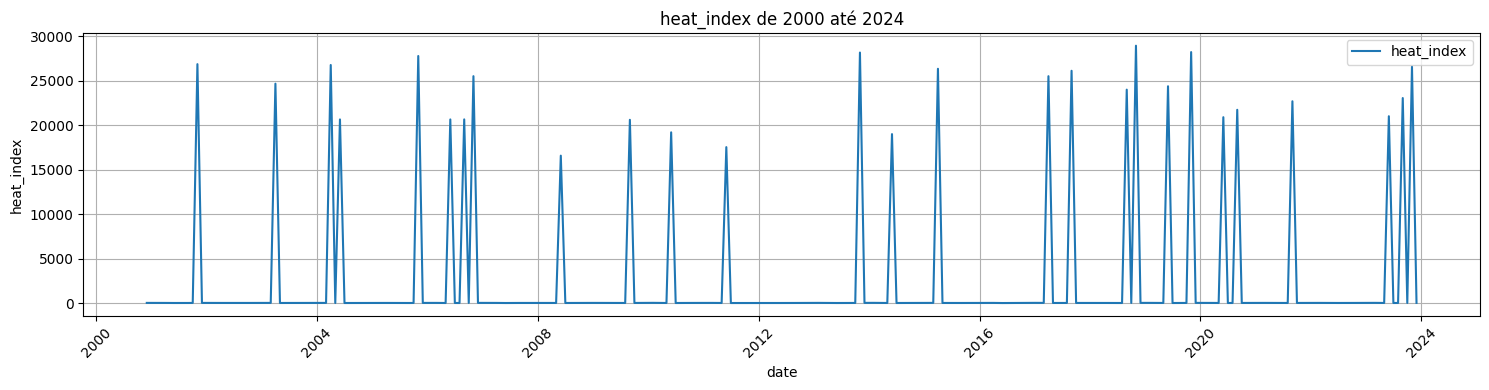

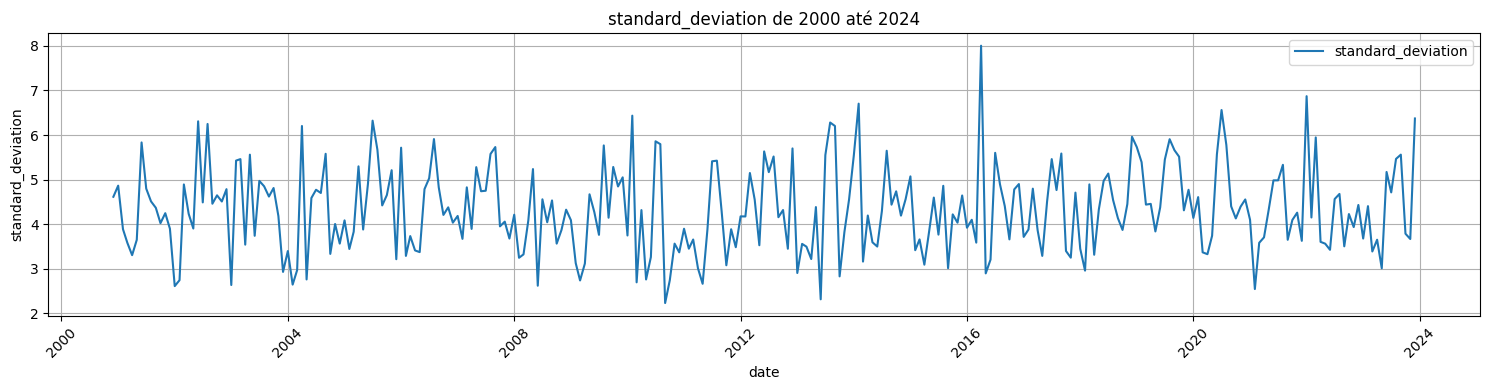

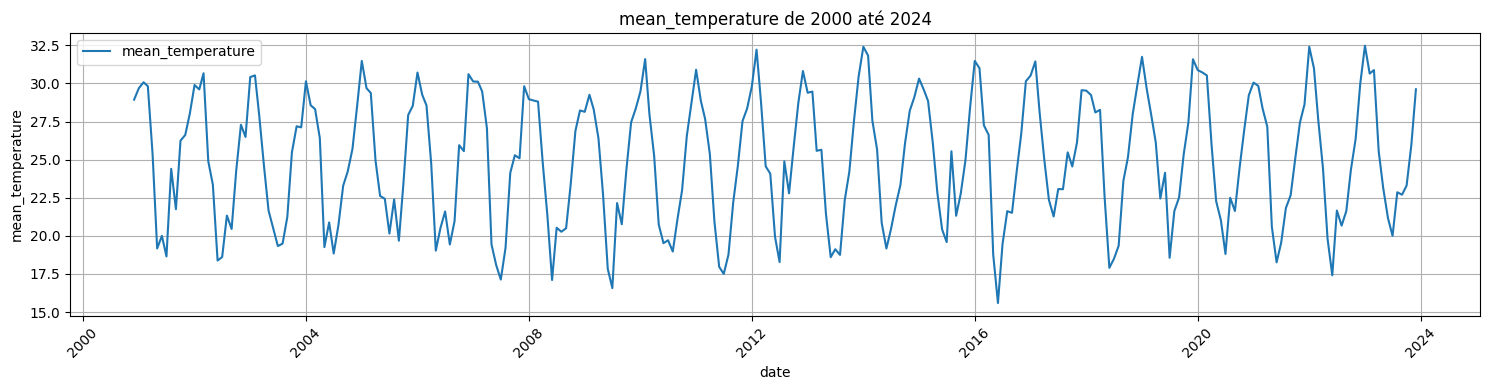

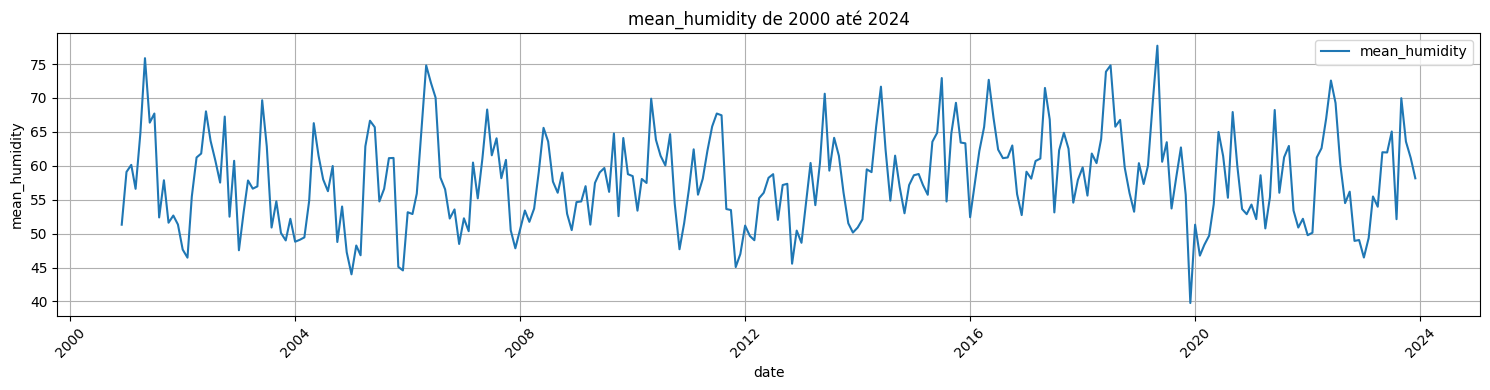

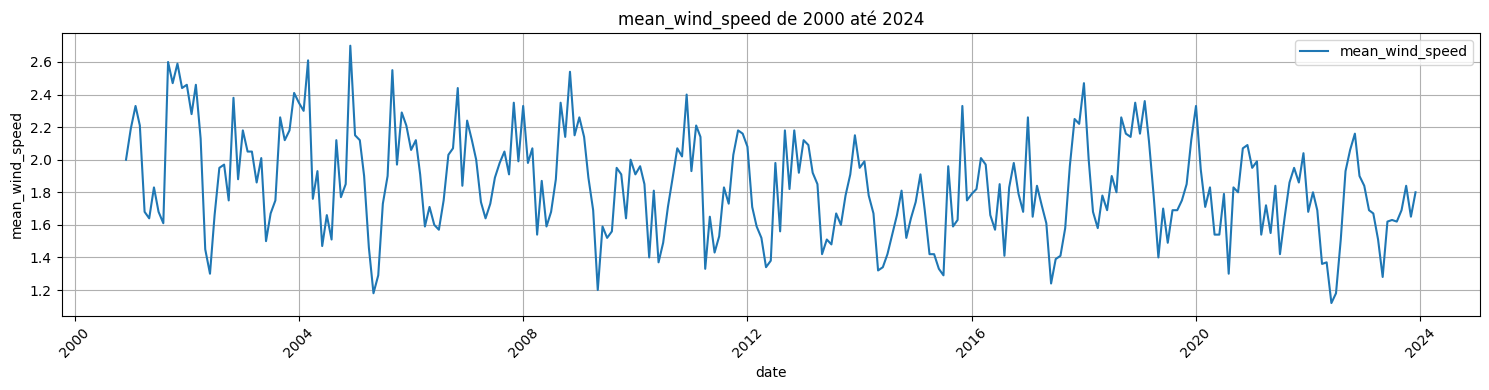

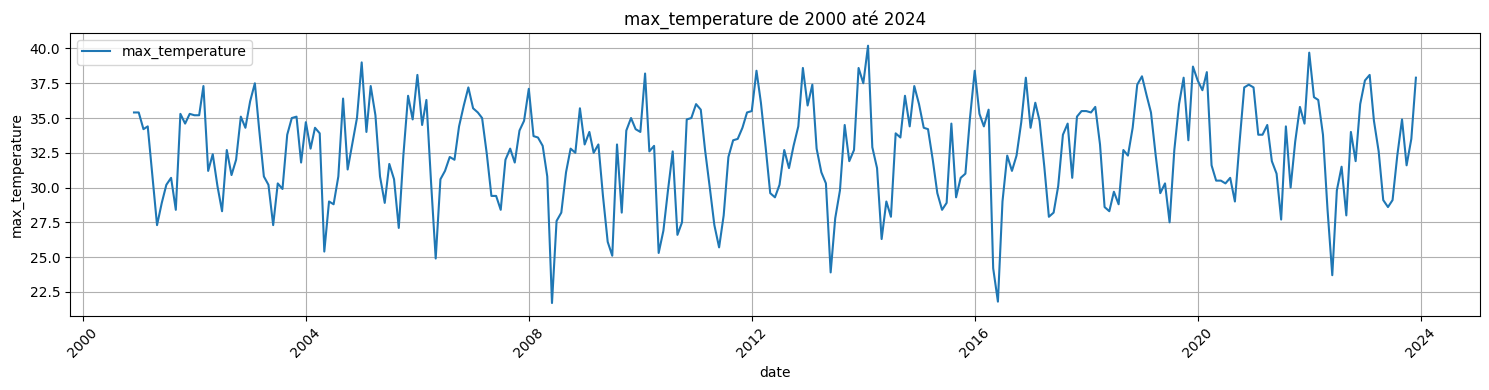

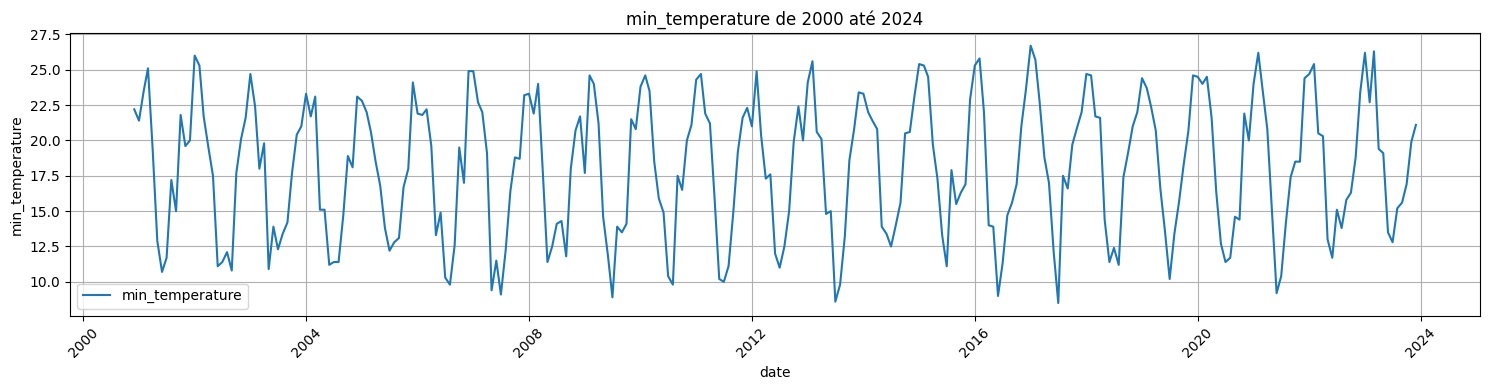

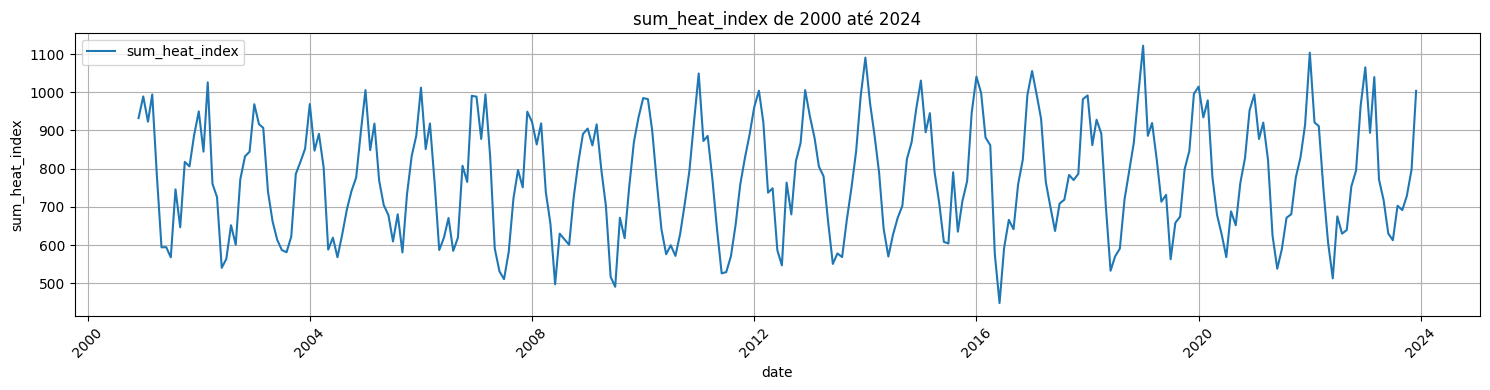

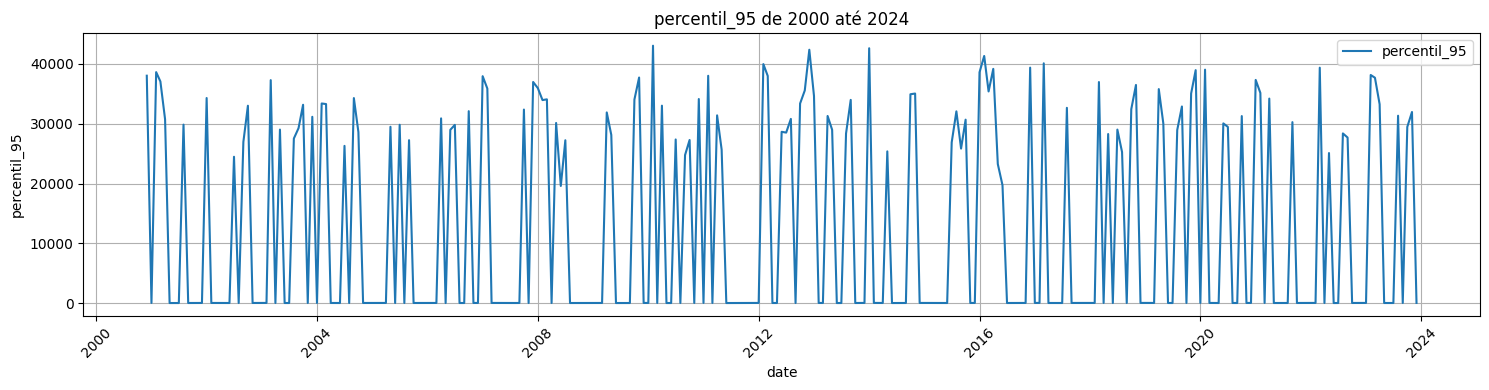

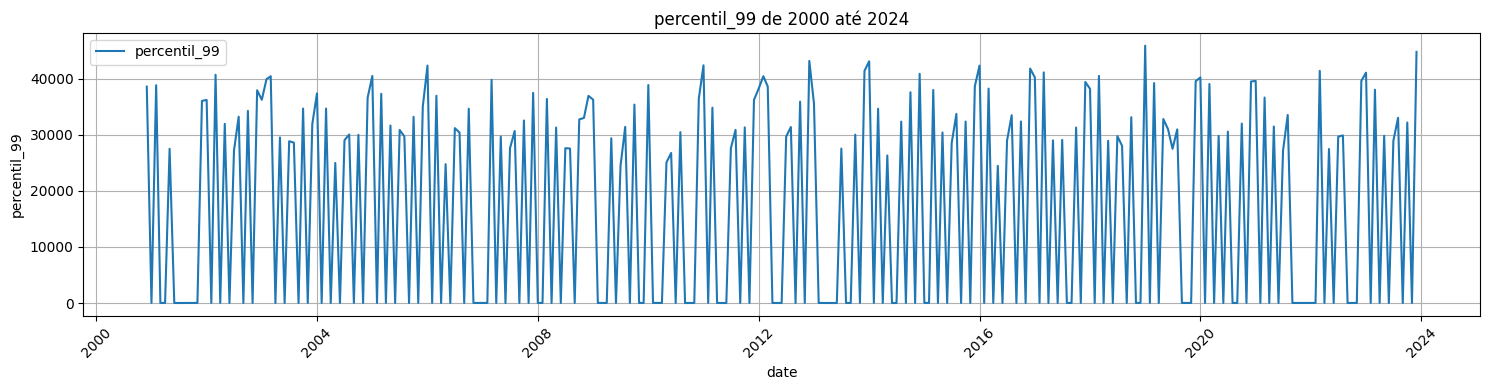

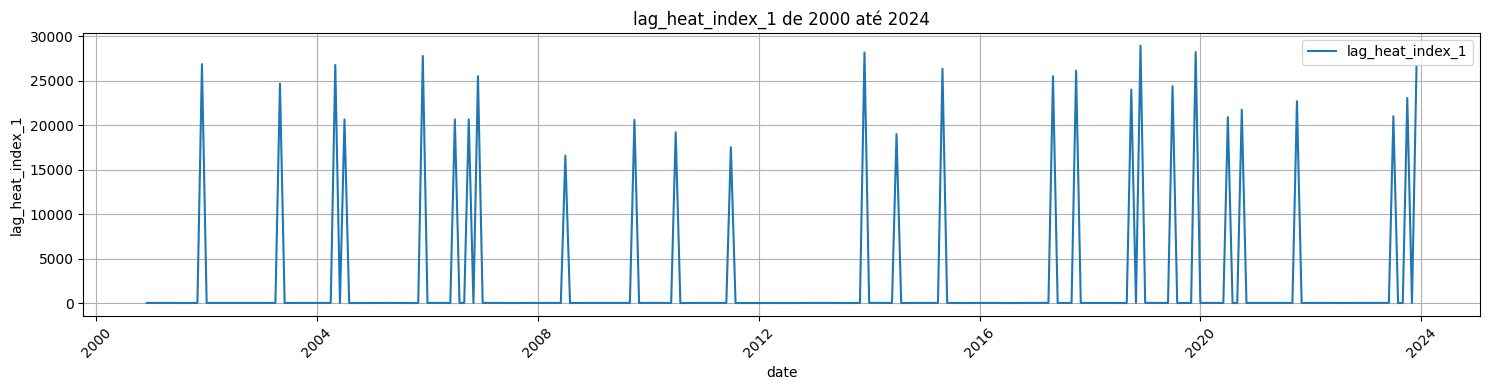

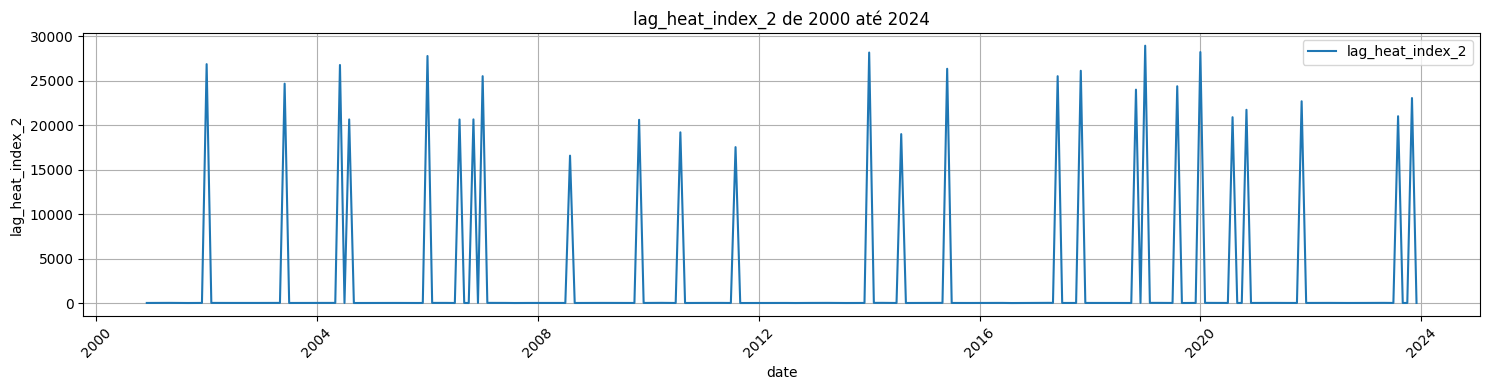

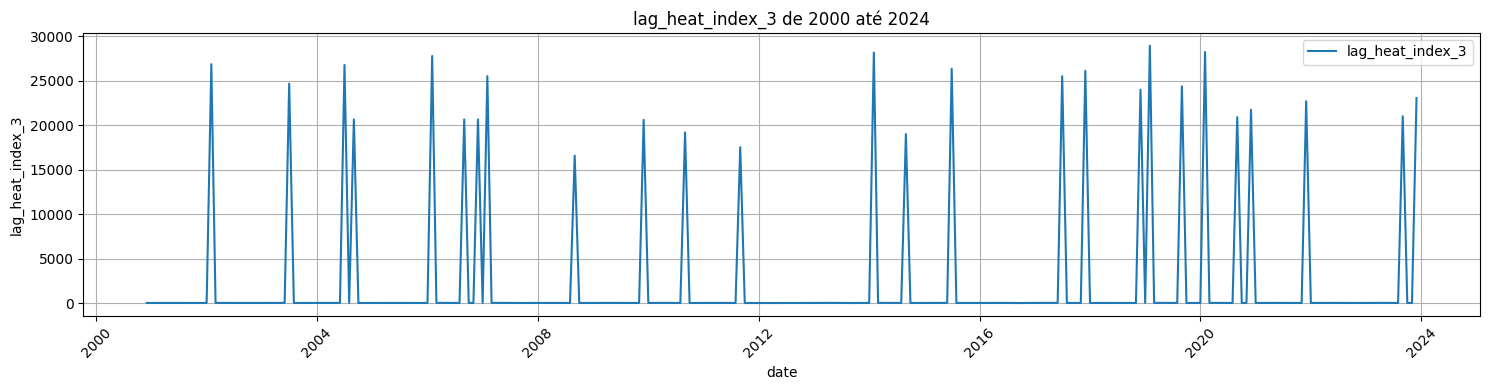

In [76]:
for feature in features_inmet:
    title = f"{feature} de 2000 até 2024"
    plot(dataset.index, dataset[feature], title, 'date', feature)

### Plot features de doenças cárdiacas

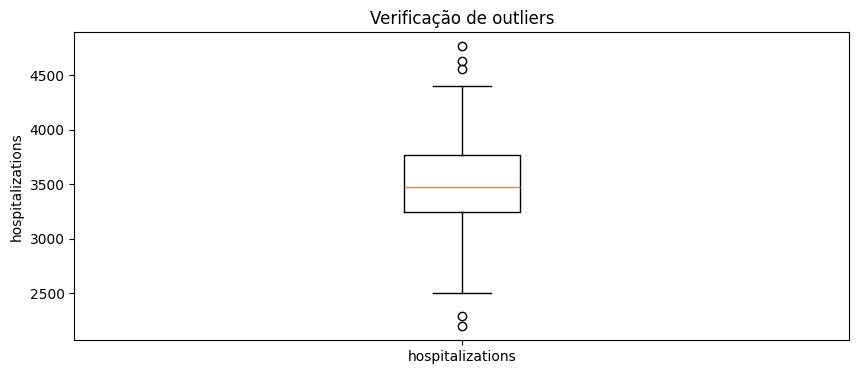

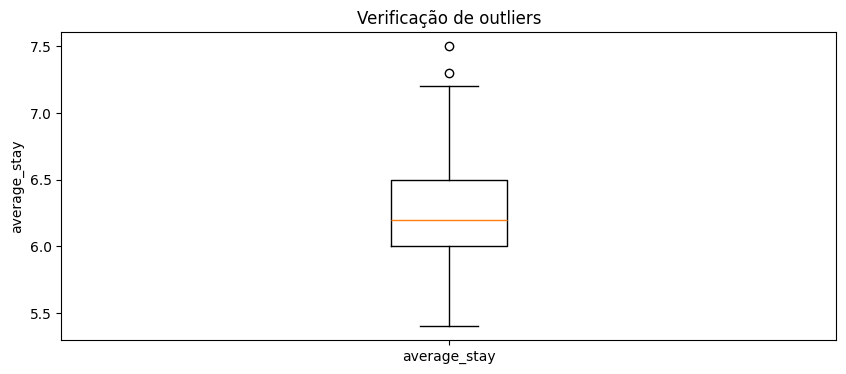

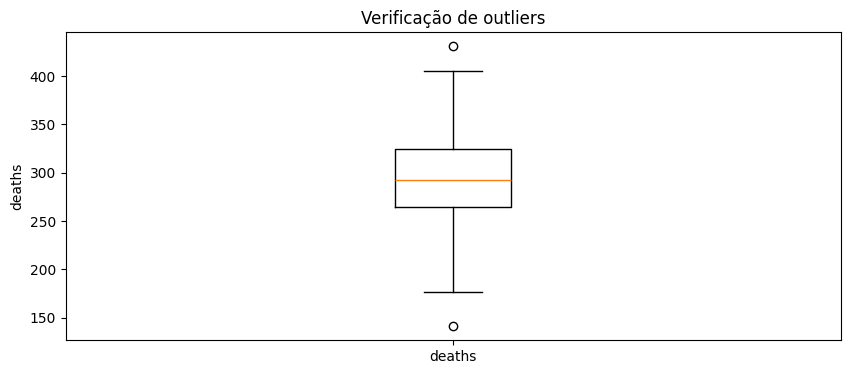

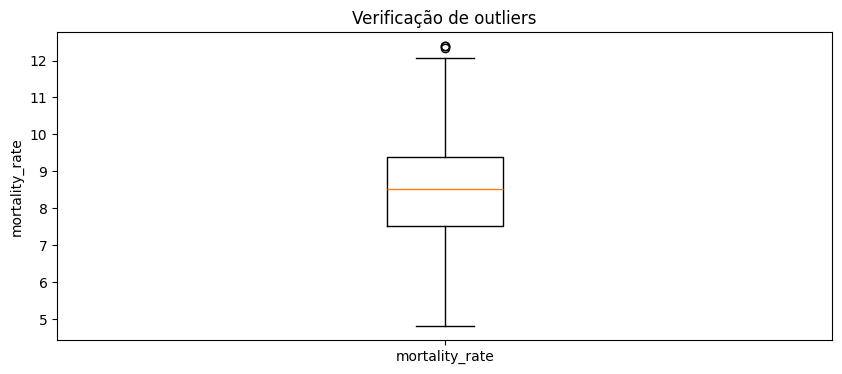

In [77]:
for feature in features_datasus:
    boxplot(dataset[feature], [feature], "Verificação de outliers", feature, figsize=(10, 4))

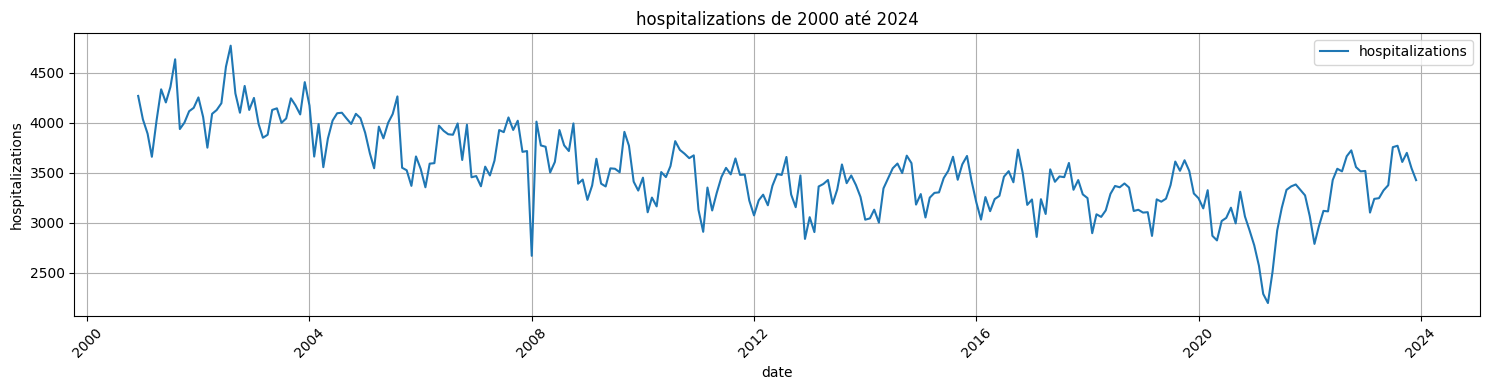

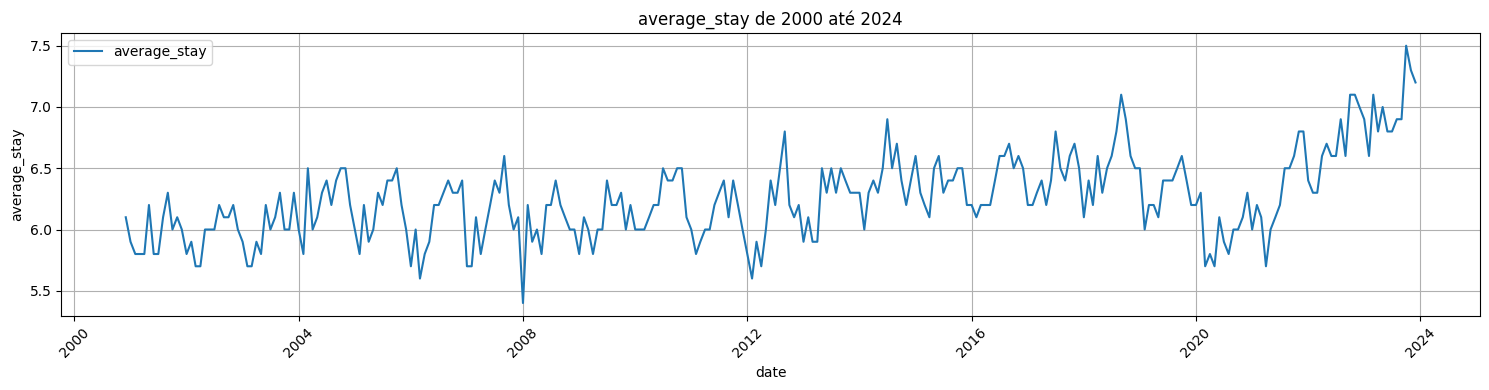

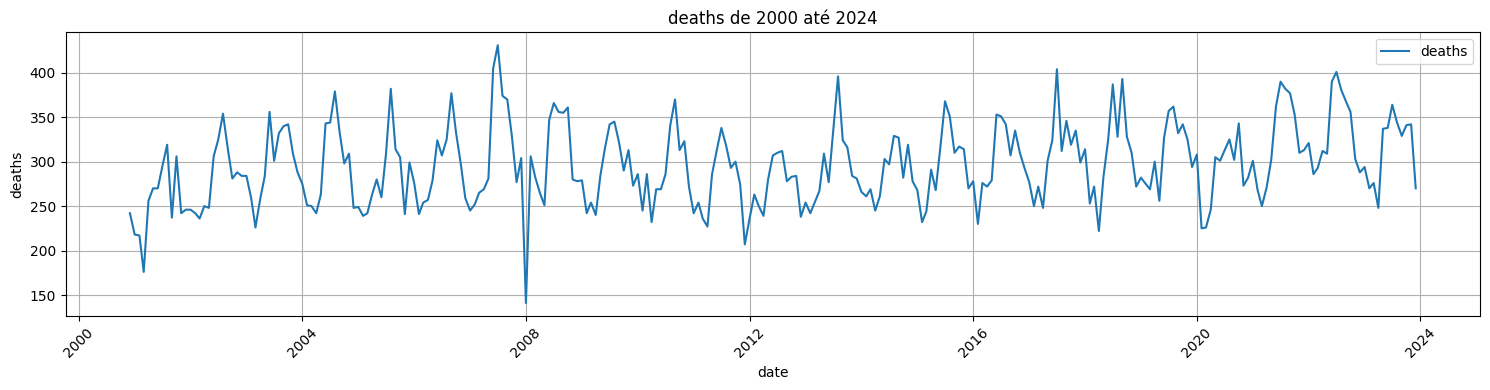

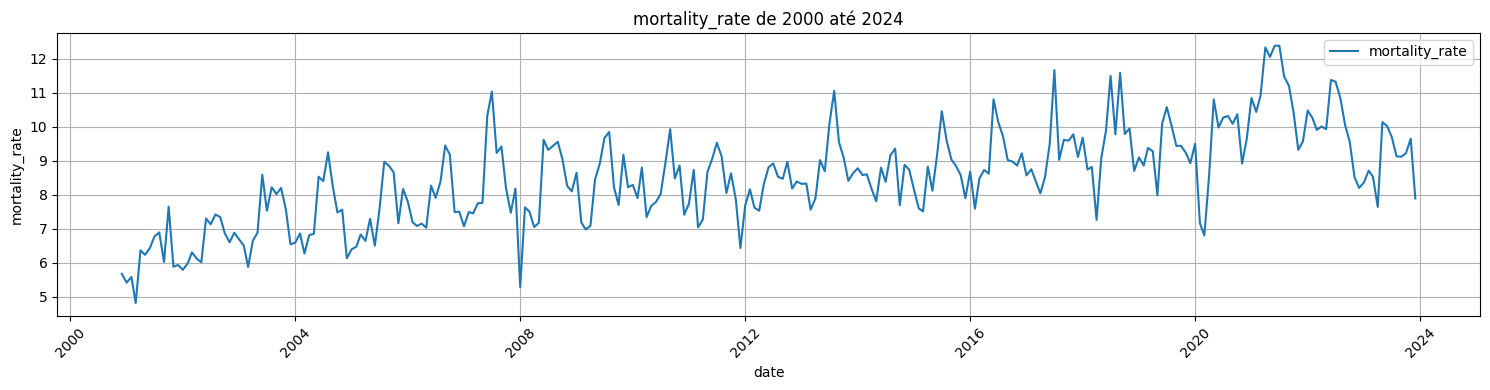

In [78]:
for feature in features_datasus:
    title = f"{feature} de 2000 até 2024"
    plot(dataset.index, dataset[feature], title, 'date', feature)

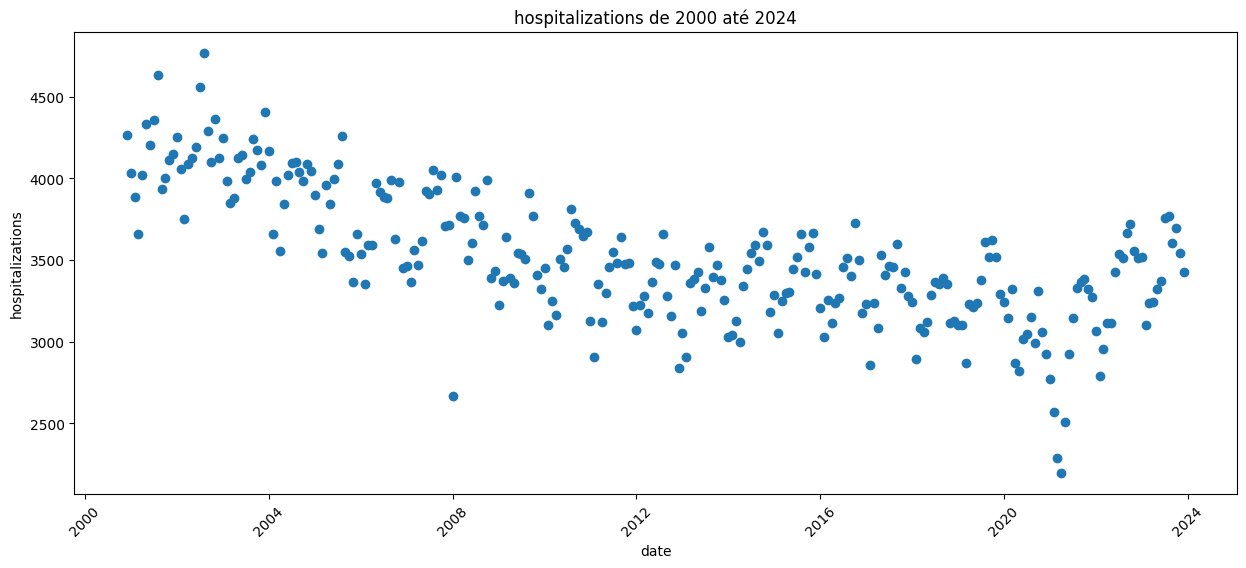

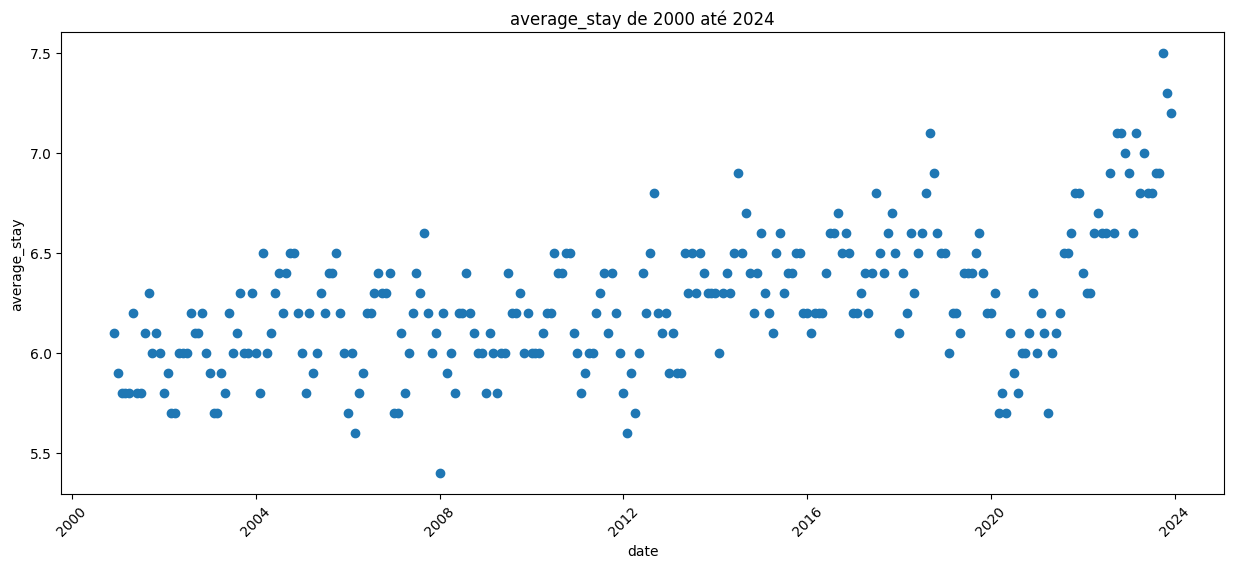

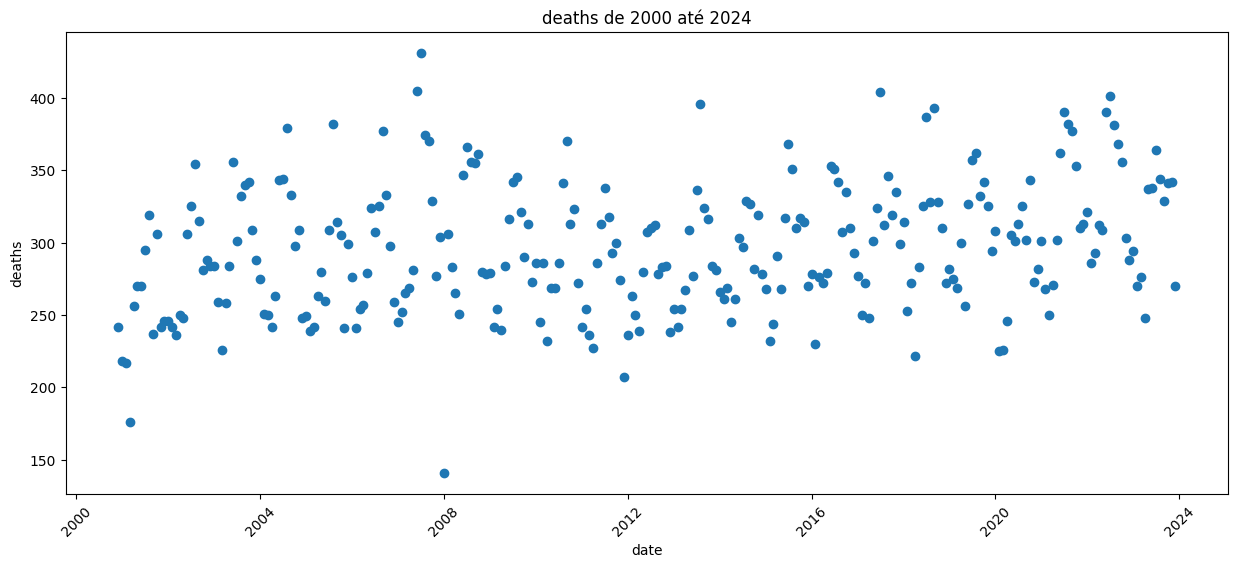

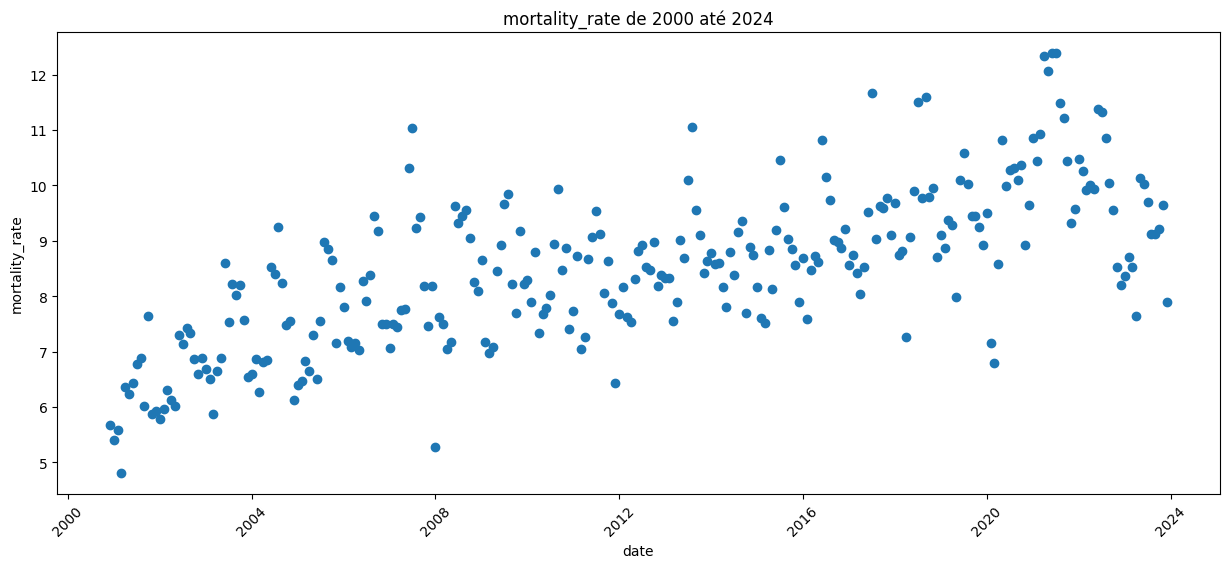

In [79]:
for feature in features_datasus:
    title = f"{feature} de 2000 até 2024"
    scatter_plot(dataset.index, dataset[feature], title, 'date', feature)

#### Análise 2008

In [80]:
start_date = pd.to_datetime('2008-01-01')
end_date = pd.to_datetime('2008-12-01')

filter_2008 = dataset[(dataset.index >= start_date) & (dataset.index <= end_date)]

filter_2008[features_datasus]

hospitalizations  average_stay  deaths  mortality_rate
date                                                              
2008-01-01              2668           5.4     141            5.28
2008-02-01              4009           6.2     306            7.63
2008-03-01              3771           5.9     283            7.50
2008-04-01              3758           6.0     265            7.05
2008-05-01              3501           5.8     251            7.17
2008-06-01              3606           6.2     347            9.62
2008-07-01              3925           6.2     366            9.32
2008-08-01              3772           6.4     356            9.44
2008-09-01              3715           6.2     355            9.56
2008-10-01              3991           6.1     361            9.05
2008-11-01              3389           6.0     280            8.26
2008-12-01              3430           6.0     278            8.10

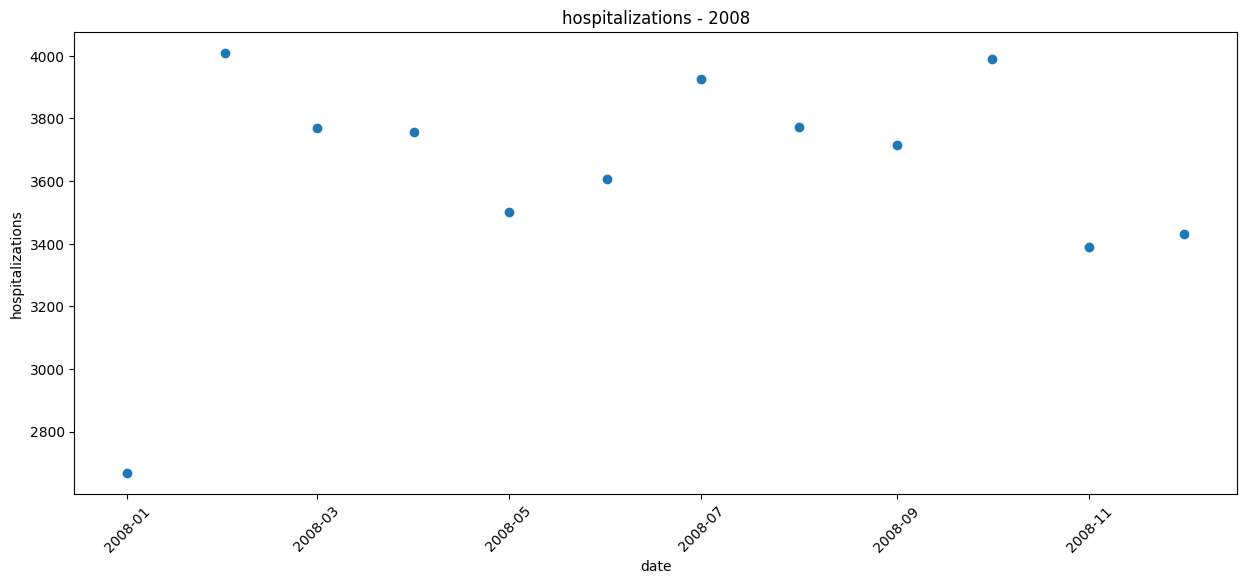

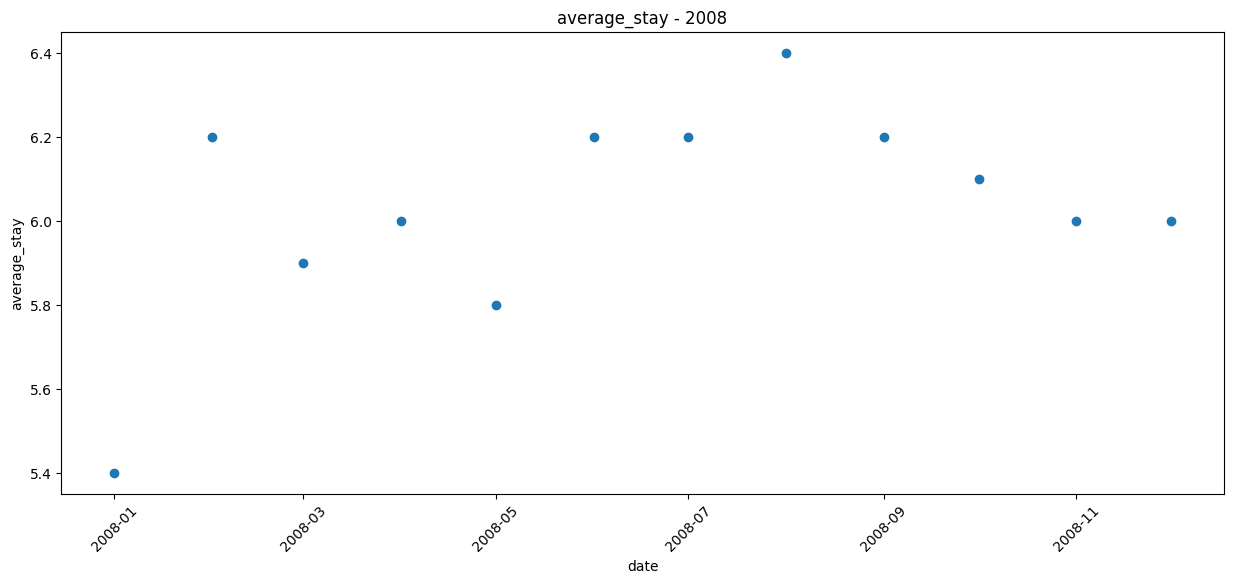

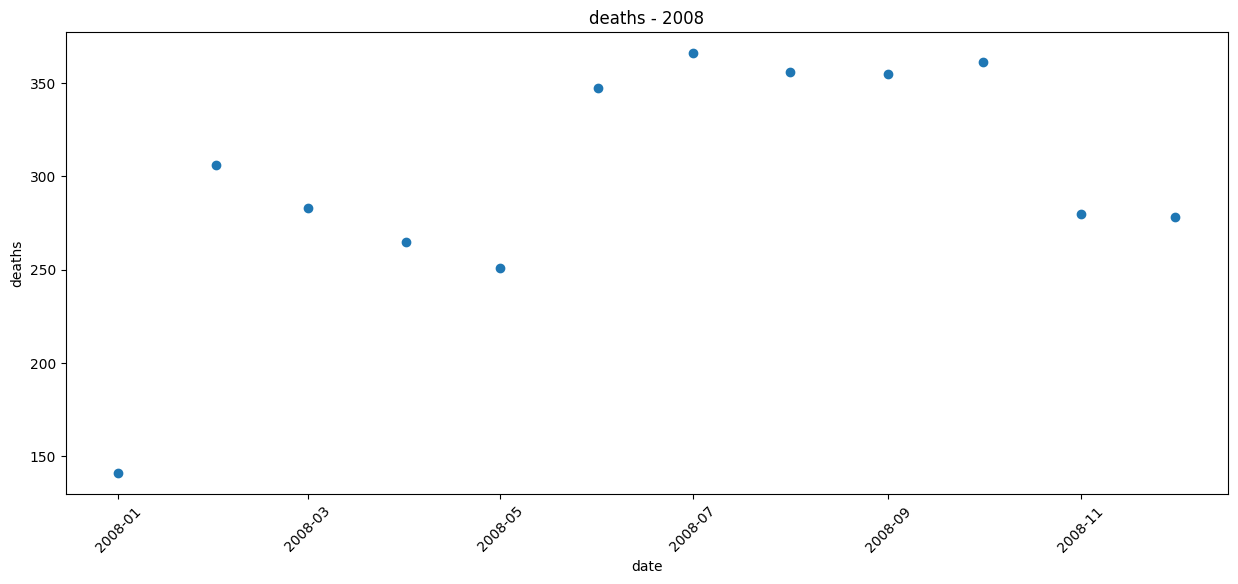

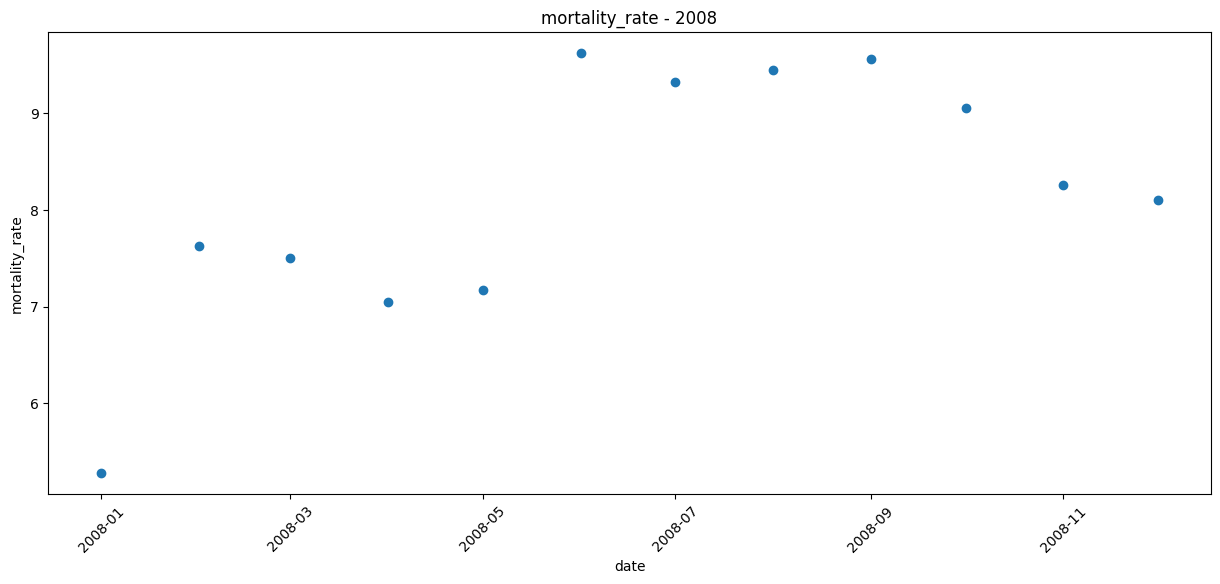

In [81]:
for feature in features_datasus:
    title = f"{feature} - 2008"
    scatter_plot(filter_2008.index, filter_2008[feature], title, 'date', feature)

#### 2007 até 2009

In [82]:
start_date = pd.to_datetime('2007-01-01')
end_date = pd.to_datetime('2009-12-01')

filter_2007_2009 = dataset[(dataset.index >= start_date) & (dataset.index <= end_date)]

filter_2007_2009[features_datasus]

hospitalizations  average_stay  deaths  mortality_rate
date                                                              
2007-01-01              3465           5.7     245            7.07
2007-02-01              3363           5.7     252            7.49
2007-03-01              3559           6.1     265            7.45
2007-04-01              3471           5.8     269            7.75
2007-05-01              3619           6.0     281            7.76
2007-06-01              3925           6.2     405           10.32
2007-07-01              3904           6.4     431           11.04
2007-08-01              4051           6.3     374            9.23
2007-09-01              3926           6.6     370            9.42
2007-10-01              4018           6.2     329            8.19
2007-11-01              3707           6.0     277            7.47
2007-12-01              3715           6.1     304            8.18
2008-01-01              2668           5.4     141            5.28
2008-02-01              4009           6.2     306            7.63
2008-03-01              3771           5.9     283            7.50
2008-04-01              3758           6.0     265            7.05
2008-05-01              3501           5.8     251            7.17
2008-06-01              3606           6.2     347            9.62
2008-07-01              3925           6.2     366            9.32
2008-08-01              3772           6.4     356            9.44
2008-09-01              3715           6.2     355            9.56
2008-10-01              3991           6.1     361            9.05
2008-11-01              3389           6.0     280            8.26
2008-12-01              3430           6.0     278            8.10
2009-01-01              3227           5.8     279            8.65
2009-02-01              3371           6.1     242            7.18
2009-03-01              3638           6.0     254            6.98
2009-04-01              3389           5.8     240            7.08
2009-05-01              3361           6.0     284            8.45
2009-06-01              3542           6.0     316            8.92
2009-07-01              3538           6.4     342            9.67
2009-08-01              3503           6.2     345            9.85
2009-09-01              3907           6.2     321            8.22
2009-10-01              3768           6.3     290            7.70
2009-11-01              3409           6.0     313            9.18
2009-12-01              3320           6.2     273            8.22

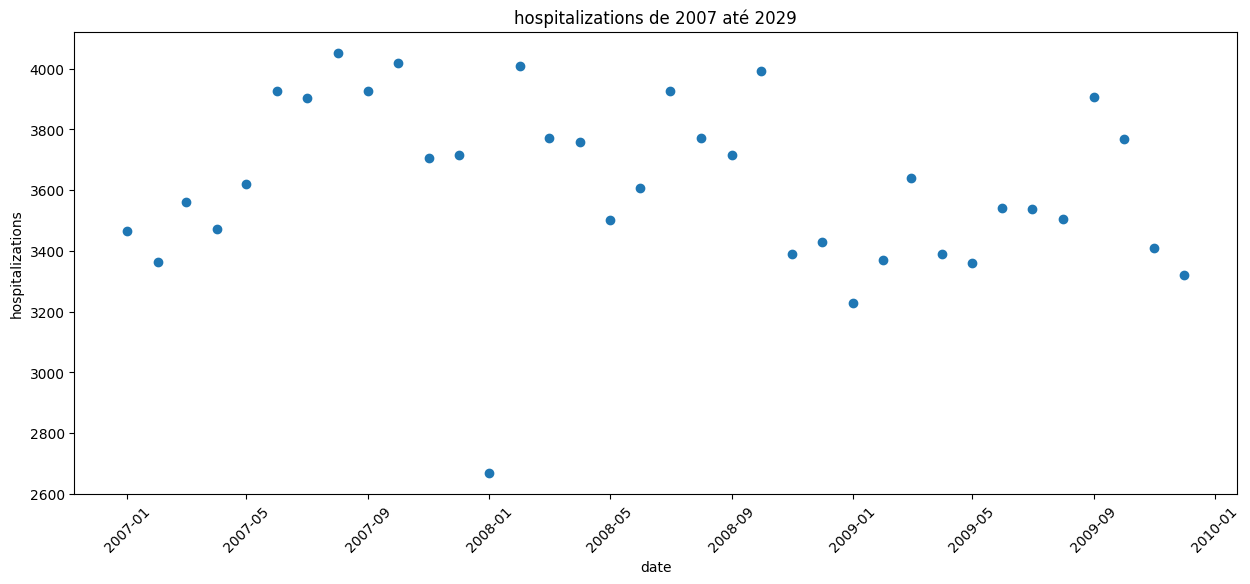

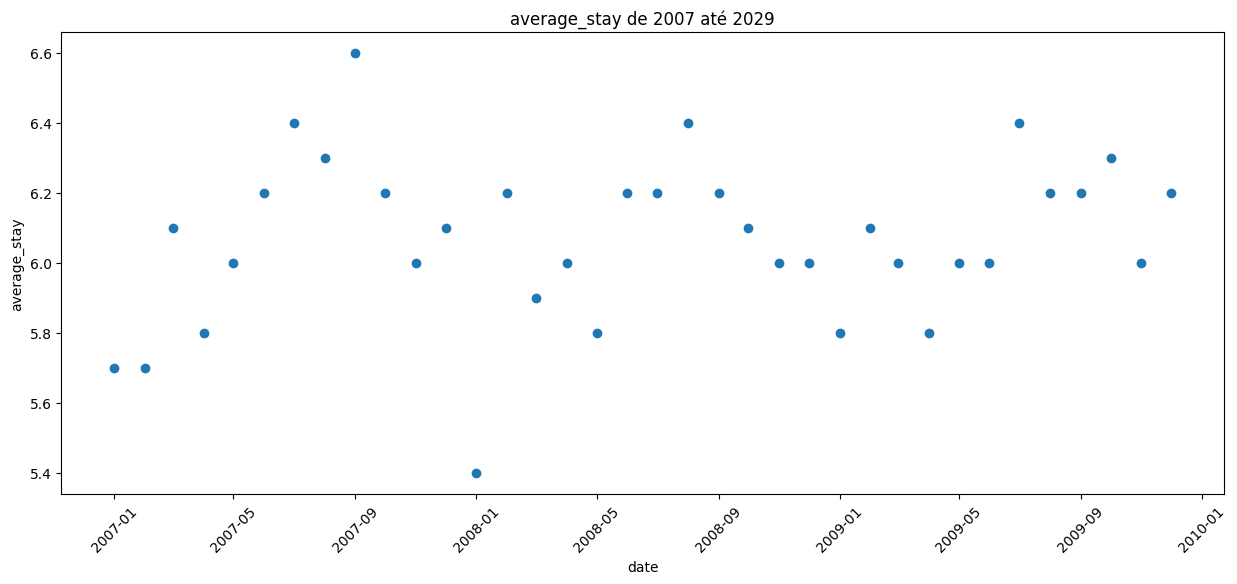

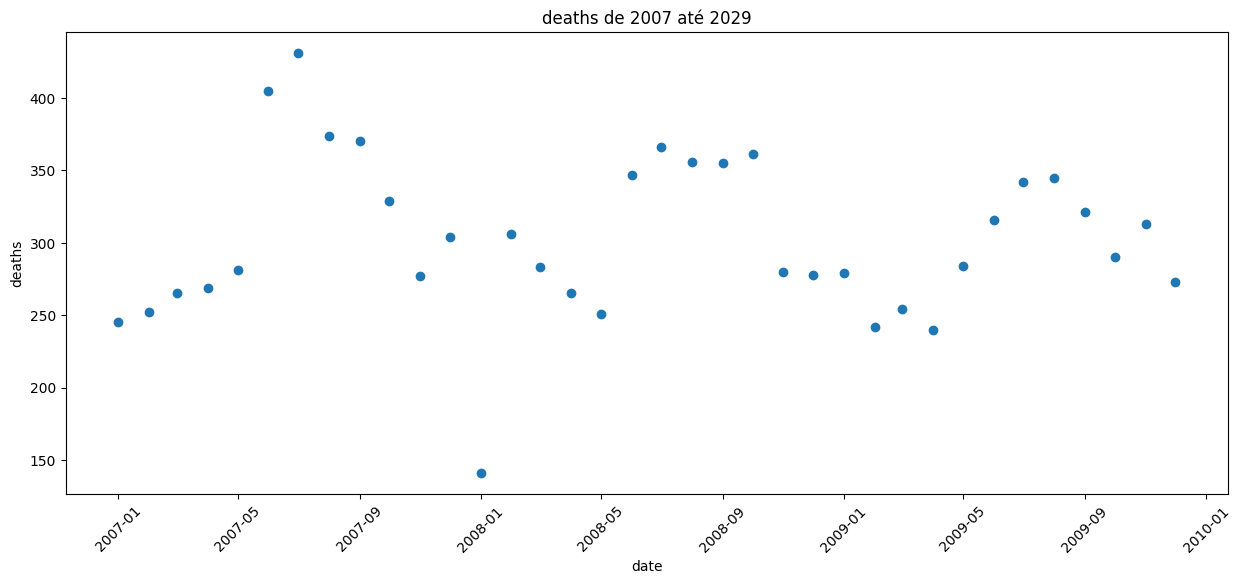

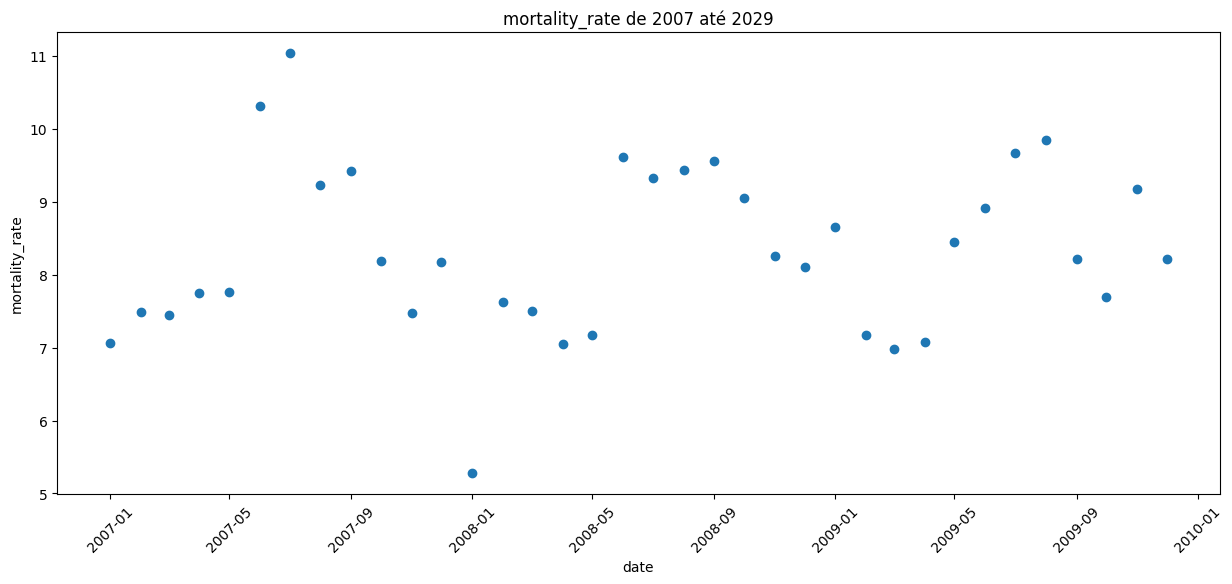

In [83]:
for feature in features_datasus:
    title = f"{feature} de 2007 até 2029"
    scatter_plot(filter_2007_2009.index, filter_2007_2009[feature], title, 'date', feature)

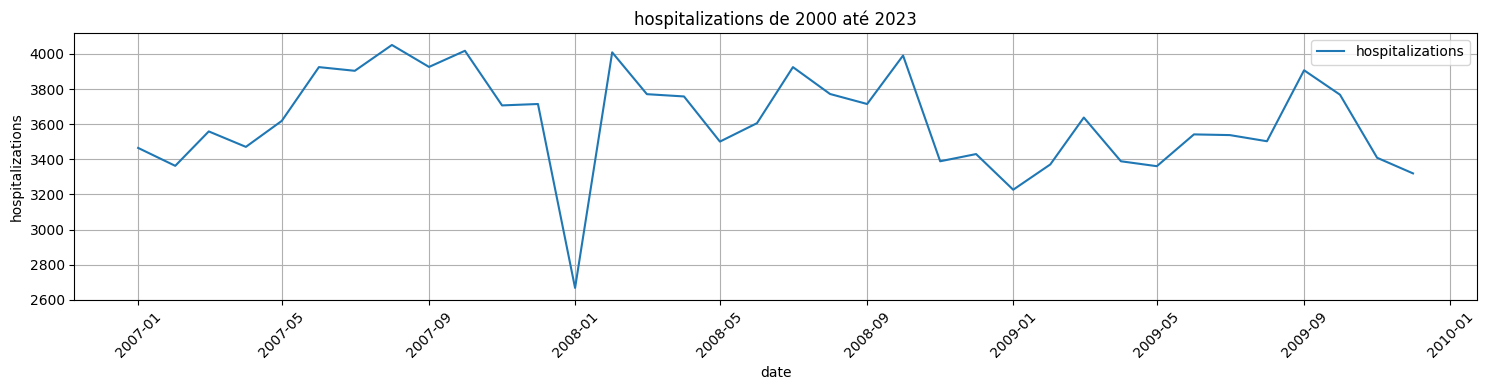

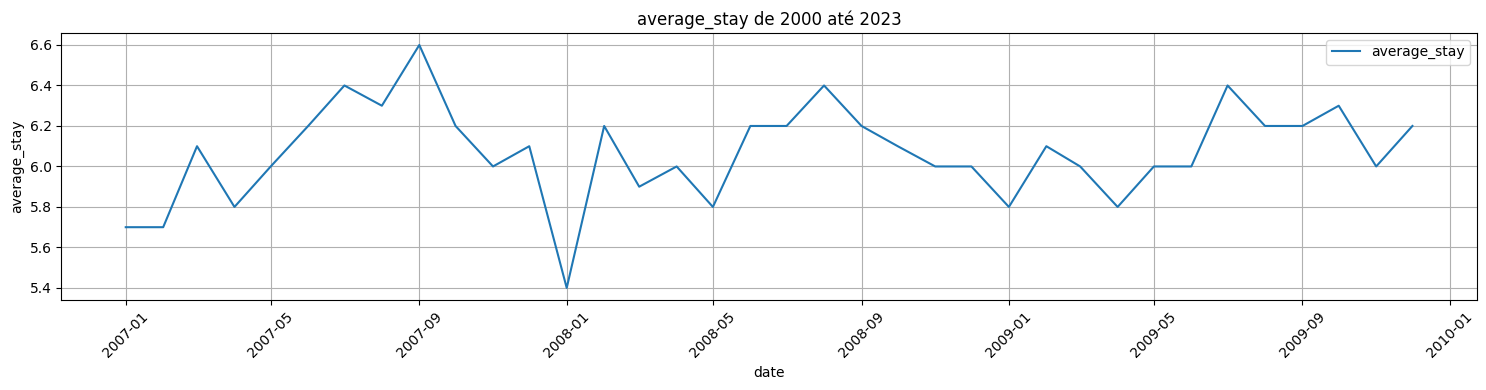

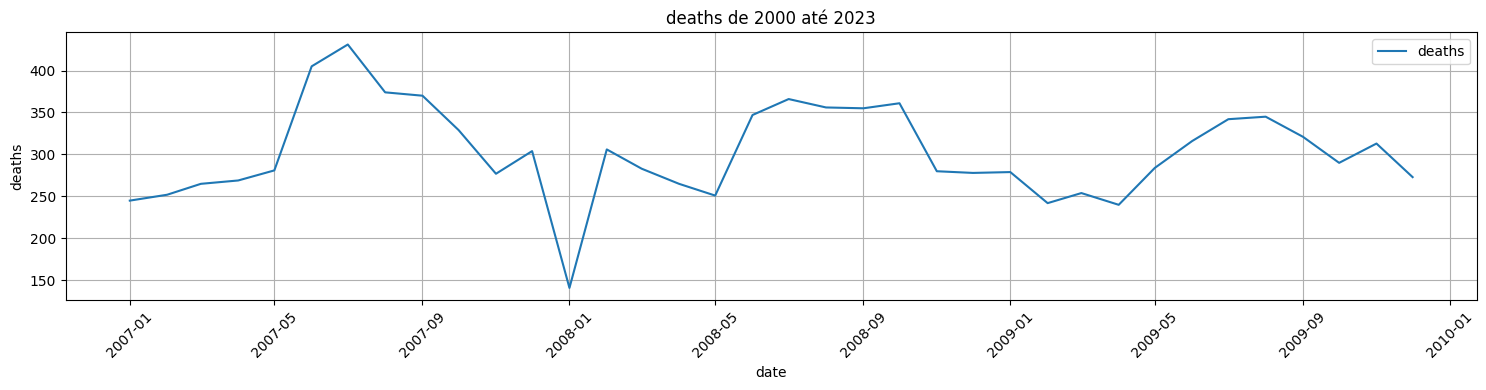

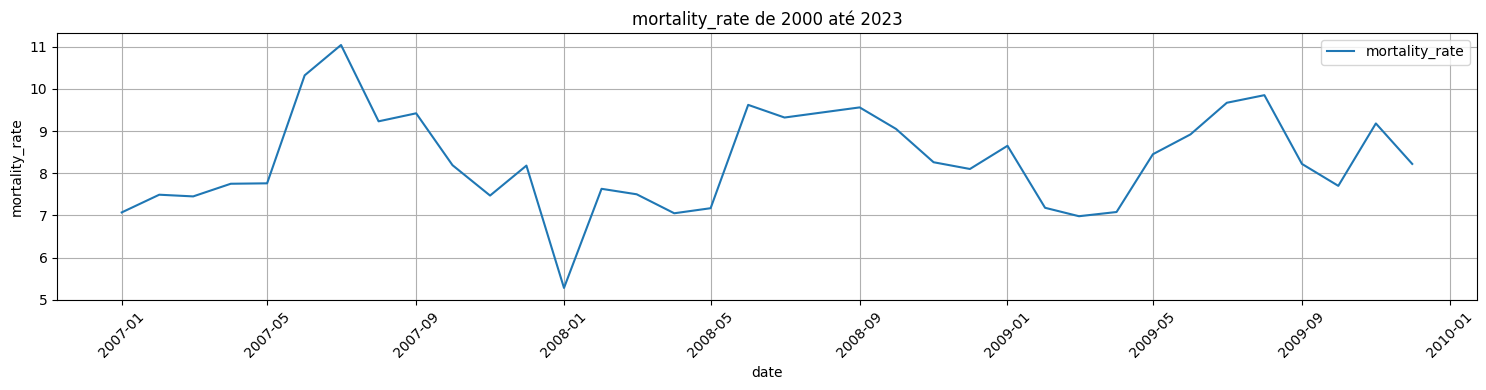

In [84]:
for feature in features_datasus:
    title = f"{feature} de 2000 até 2023"
    plot(filter_2007_2009.index, filter_2007_2009[feature], title, 'date', feature)

#### 2020 até 2024

In [85]:
start_date = pd.to_datetime('2020-01-01')
end_date = pd.to_datetime('2023-12-01')

filter_2007_2009 = dataset[(dataset.index >= start_date) & (dataset.index <= end_date)]

filter_2007_2009[features_datasus]

hospitalizations  average_stay  deaths  mortality_rate
date                                                              
2020-01-01              3243           6.2     308            9.50
2020-02-01              3142           6.3     225            7.16
2020-03-01              3324           5.7     226            6.80
2020-04-01              2868           5.8     246            8.58
2020-05-01              2822           5.7     305           10.81
2020-06-01              3016           6.1     301            9.98
2020-07-01              3047           5.9     313           10.27
2020-08-01              3149           5.8     325           10.32
2020-09-01              2992           6.0     302           10.09
2020-10-01              3308           6.0     343           10.37
2020-11-01              3061           6.1     273            8.92
2020-12-01              2924           6.3     282            9.64
2021-01-01              2773           6.0     301           10.85
2021-02-01              2568           6.2     268           10.44
2021-03-01              2287           6.1     250           10.93
2021-04-01              2196           5.7     271           12.34
2021-05-01              2505           6.0     302           12.06
2021-06-01              2922           6.1     362           12.39
2021-07-01              3147           6.2     390           12.39
2021-08-01              3327           6.5     382           11.48
2021-09-01              3362           6.5     377           11.21
2021-10-01              3381           6.6     353           10.44
2021-11-01              3325           6.8     310            9.32
2021-12-01              3272           6.8     313            9.57
2022-01-01              3064           6.4     321           10.48
2022-02-01              2787           6.3     286           10.26
2022-03-01              2957           6.3     293            9.91
2022-04-01              3117           6.6     312           10.01
2022-05-01              3112           6.7     309            9.93
2022-06-01              3426           6.6     390           11.38
2022-07-01              3538           6.6     401           11.33
2022-08-01              3512           6.9     381           10.85
2022-09-01              3663           6.6     368           10.05
2022-10-01              3722           7.1     356            9.56
2022-11-01              3555           7.1     303            8.52
2022-12-01              3512           7.0     288            8.20
2023-01-01              3516           6.9     294            8.36
2023-02-01              3100           6.6     270            8.71
2023-03-01              3237           7.1     276            8.53
2023-04-01              3244           6.8     248            7.64
2023-05-01              3322           7.0     337           10.14
2023-06-01              3374           6.8     338           10.02
2023-07-01              3754           6.8     364            9.70
2023-08-01              3768           6.9     344            9.13
2023-09-01              3606           6.9     329            9.12
2023-10-01              3697           7.5     341            9.22
2023-11-01              3543           7.3     342            9.65
2023-12-01              3424           7.2     270            7.89

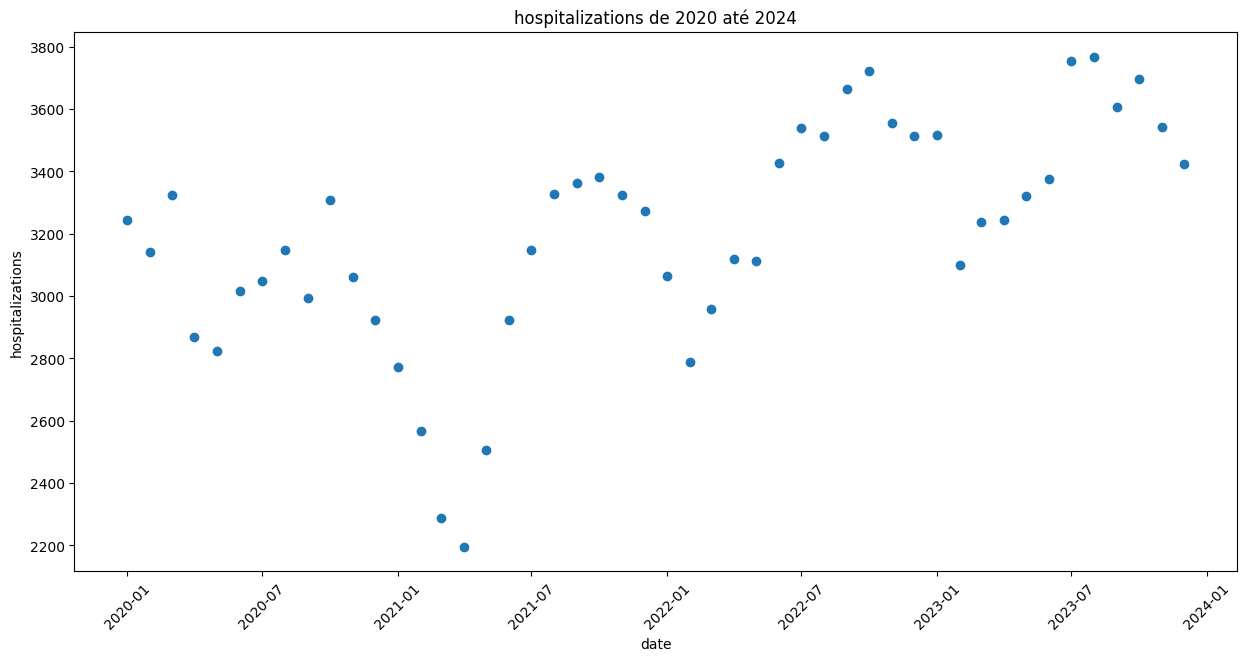

In [86]:
feature = 'hospitalizations'
title = f"{feature} de 2020 até 2024"
scatter_plot(filter_2007_2009.index, filter_2007_2009[feature], title, 'date', feature, figsize=(15, 7))

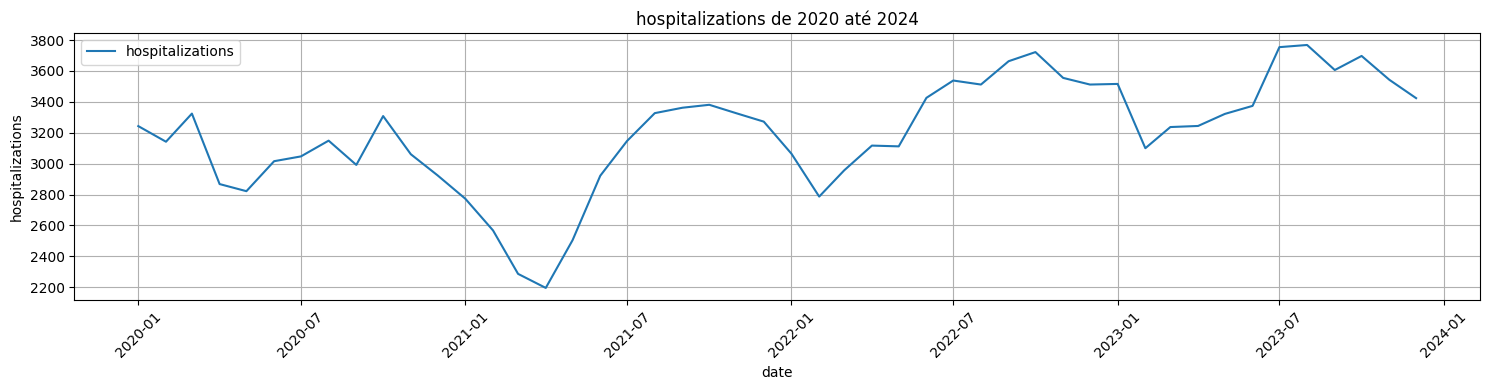

In [87]:
feature = 'hospitalizations'
title = f"{feature} de 2020 até 2024"
plot(filter_2007_2009.index, filter_2007_2009[feature], title, 'date', feature)

#### Tratando dados de 2008

In [88]:
outlier_date = "2008-01-01"

for feature in features_datasus:
    dataset.loc[dataset.index == outlier_date, feature] = np.nan  # adiciona NaN
    dataset[feature] = dataset[feature].interpolate(method="nearest")  # Interpolação nearest
dataset.loc[dataset.index == outlier_date]

heat_index  standard_deviation  mean_temperature  mean_humidity  \
date                                                                          
2008-01-01       29.76            4.213297             28.97          50.65   

            mean_wind_speed  max_temperature  min_temperature  sum_heat_index  \
date                                                                            
2008-01-01             2.33             37.1             23.3          922.56   

            percentil_95  percentil_99  ...  lag_heat_index_2  \
date                                    ...                     
2008-01-01       35955.0         37.45  ...         25.042333   

            lag_heat_index_3  hospitalizations  average_stay  deaths  \
date                                                                   
2008-01-01         25.700968            3715.0           6.1   304.0   

            mortality_rate  deforestation  primary_forest_loss   favela  \
date                                                                      
2008-01-01            8.18           7836                    92    2039   

            urbanized_area  
date                        
2008-01-01           15895  

[1 rows x 21 columns]

In [89]:
int_columns = ['hospitalizations', 'deaths']

for column in int_columns:
    dataset[column] = dataset[column].astype(int)

dataset[features_datasus]

hospitalizations  average_stay  deaths  mortality_rate
date                                                              
2000-12-01              4266           6.1     242            5.67
2001-01-01              4032           5.9     218            5.41
2001-02-01              3888           5.8     217            5.58
2001-03-01              3658           5.8     176            4.81
2001-04-01              4022           5.8     256            6.36
...                      ...           ...     ...             ...
2023-08-01              3768           6.9     344            9.13
2023-09-01              3606           6.9     329            9.12
2023-10-01              3697           7.5     341            9.22
2023-11-01              3543           7.3     342            9.65
2023-12-01              3424           7.2     270            7.89

[277 rows x 4 columns]

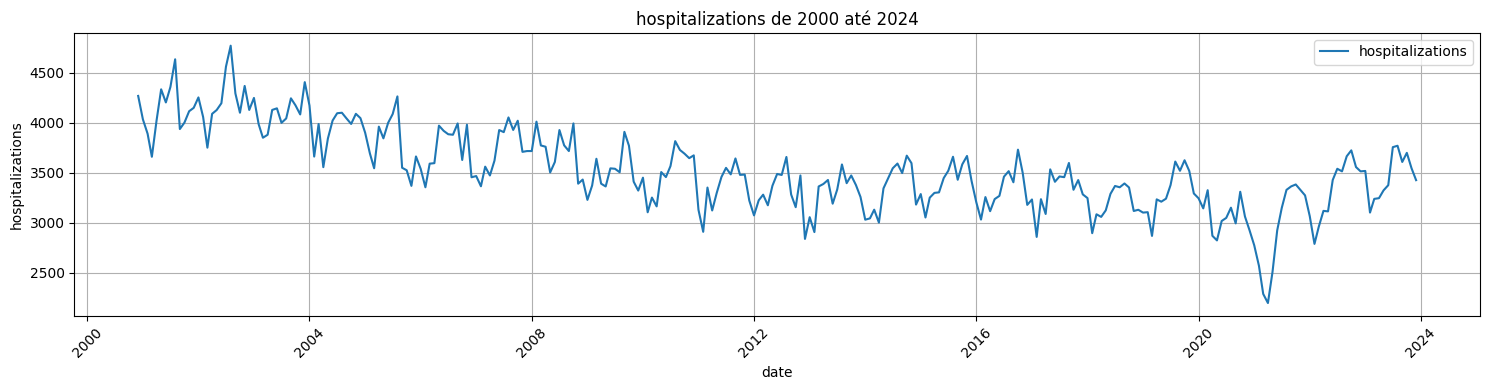

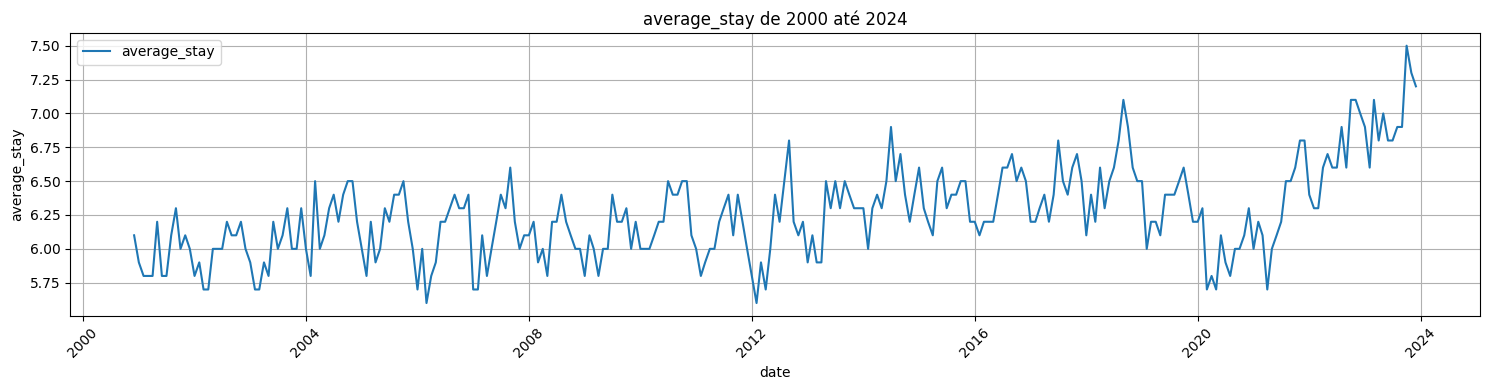

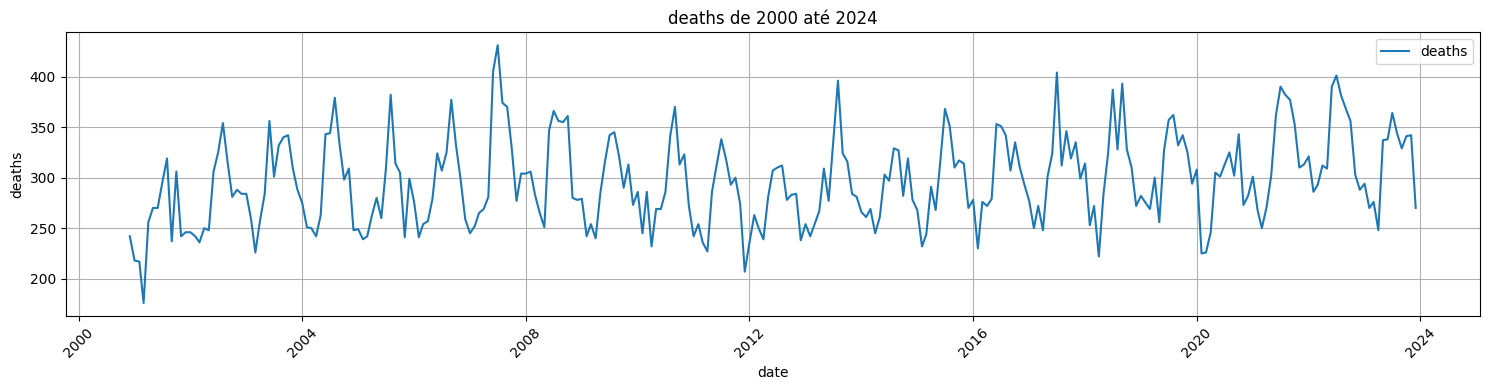

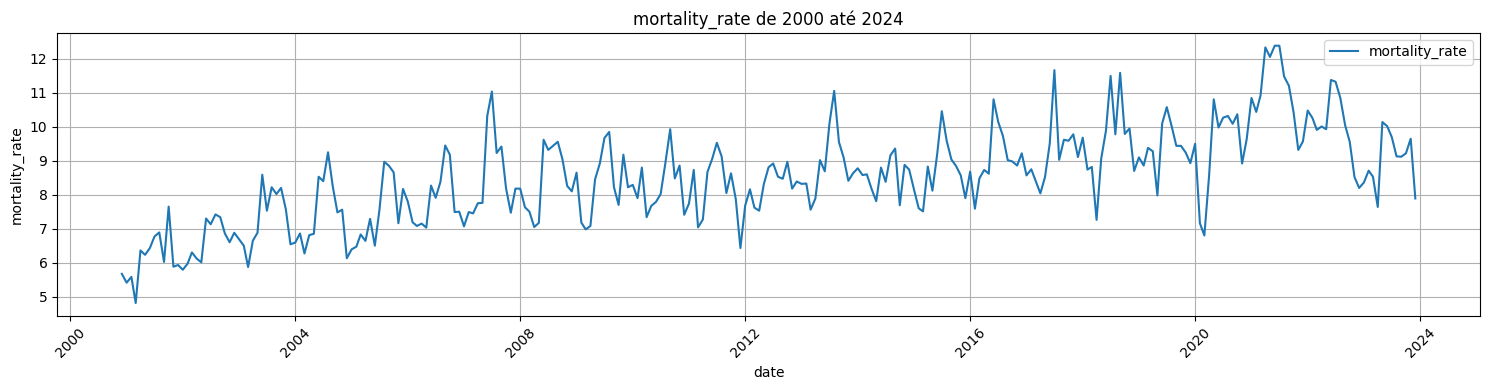

In [90]:
for feature in features_datasus:
    title = f"{feature} de 2000 até 2024"
    plot(dataset.index, dataset[feature], title, 'date', feature)

### Plot dados geográficos

In [91]:
url = 'https://raw.githubusercontent.com/ThierrryScotto/trabalho_pratico/refs/heads/main/datasets/desmatamento_anual.csv'

anual_deforestation = pd.read_csv(url)

# anual_deforestation['date'] = pd.to_datetime(anual_deforestation['date'], format='%Y')

anual_deforestation

date  deforestation  primary_forest_loss        favela  urbanized_area
0   2000    6164.578305                   150  1865.773354    14831.872329
1   2001    6390.131585                   201  1903.810075    14972.162742
2   2002    6538.818820                   117  1924.922796    15107.855410
3   2003    7258.073980                   576  1950.923079    15272.752609
4   2004    7407.831846                   136  1989.446720    15457.576813
5   2005    7519.867752                    88  2010.878137    15542.377585
6   2006    7605.074801                    69  2022.755452    15608.411709
7   2007    7733.475394                    74  2028.732381    15721.444812
8   2008    7836.749561                    92  2039.598701    15895.963155
9   2009    7944.823728                   101  2046.894035    15999.308530
10  2010    8048.123112                    86  2051.162720    16112.977128
11  2011    8160.702087                    91  2055.664901    16271.869041
12  2012    8291.488138                   112  2065.911510    16380.177341
13  2013    8391.121496                    83  2077.557342    16442.961072
14  2014    8435.270694                    31  2085.086775    16501.311131
15  2015    8502.448039                    34  2090.676826    16540.959790
16  2016    8554.743759                    46  2096.181223    16596.890273
17  2017    8589.977031                    28  2100.215723    16655.323510
18  2018    8637.756395                    39  2102.233114    16694.968208
19  2019    8701.213630                    50  2106.193873    16730.279450
20  2020    8740.005324                    31  2108.523469    16770.181241
21  2021    8799.106106                    53  2114.424665    16800.676271
22  2022    8829.655629                    28  2119.474140    16809.533536
23  2023    8843.702904                    12  2133.371088    16874.949657

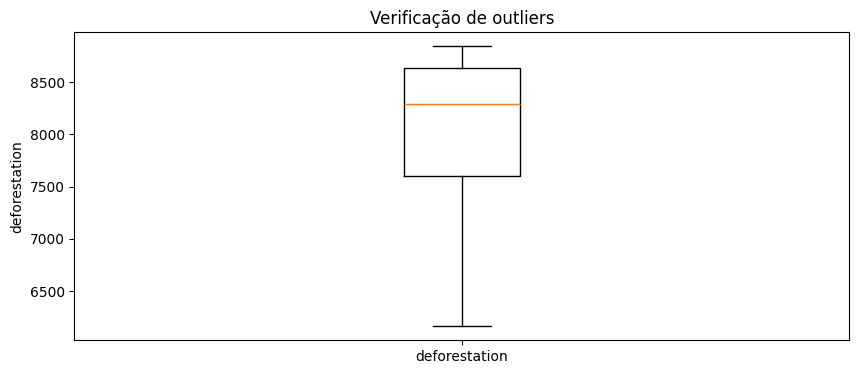

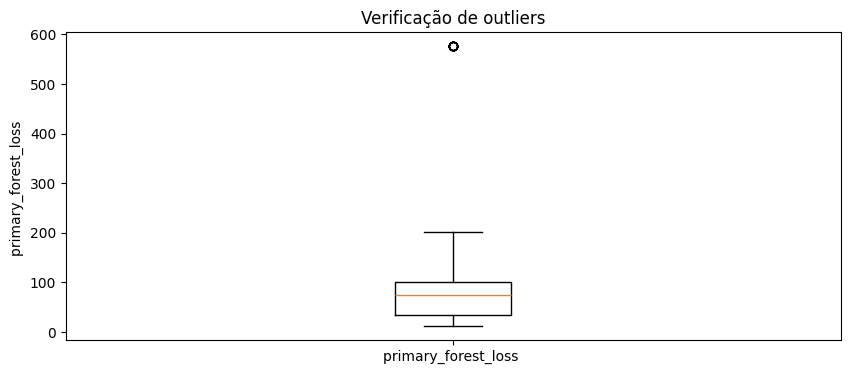

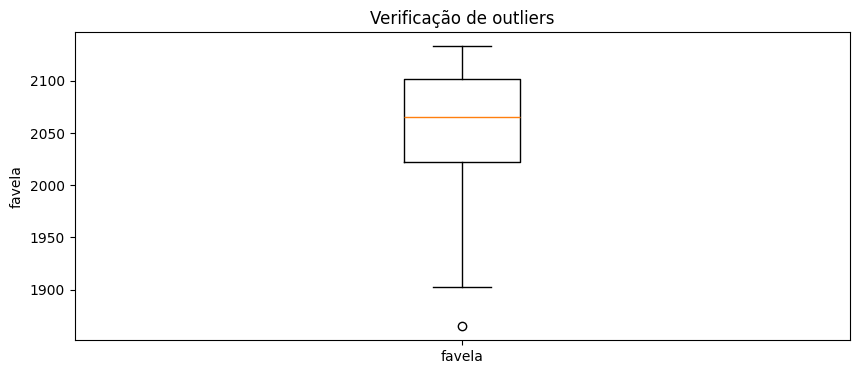

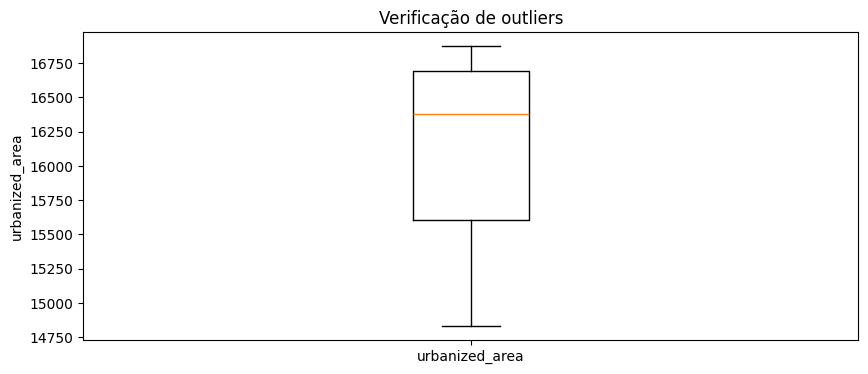

In [92]:
for feature in features_map_biomas:
    boxplot(dataset[feature], [feature], "Verificação de outliers", feature, figsize=(10, 4))

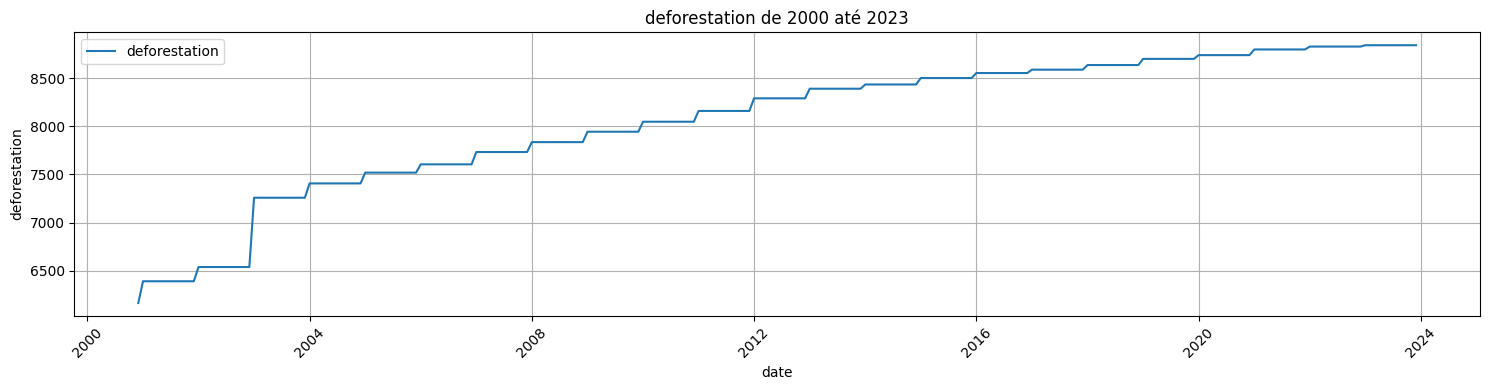

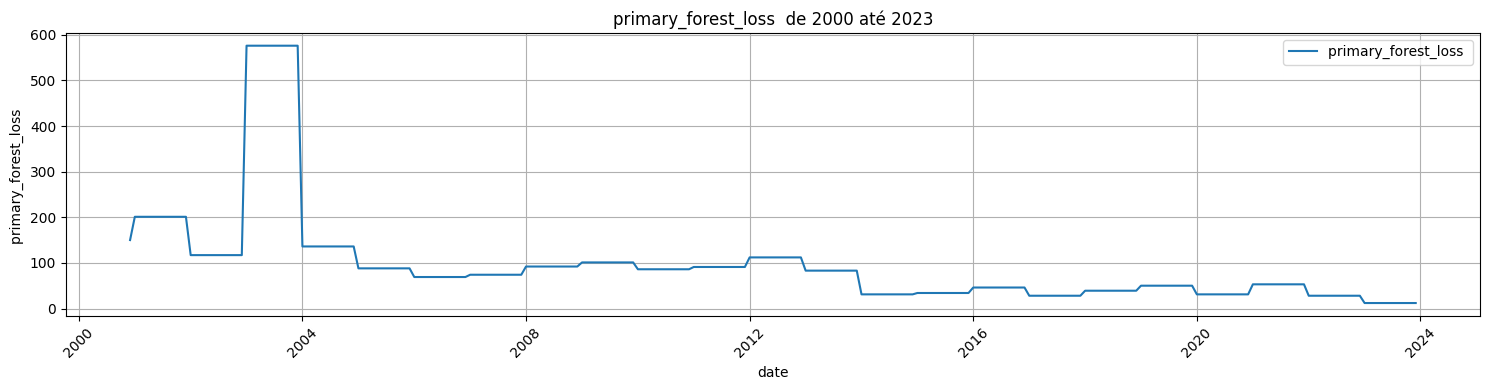

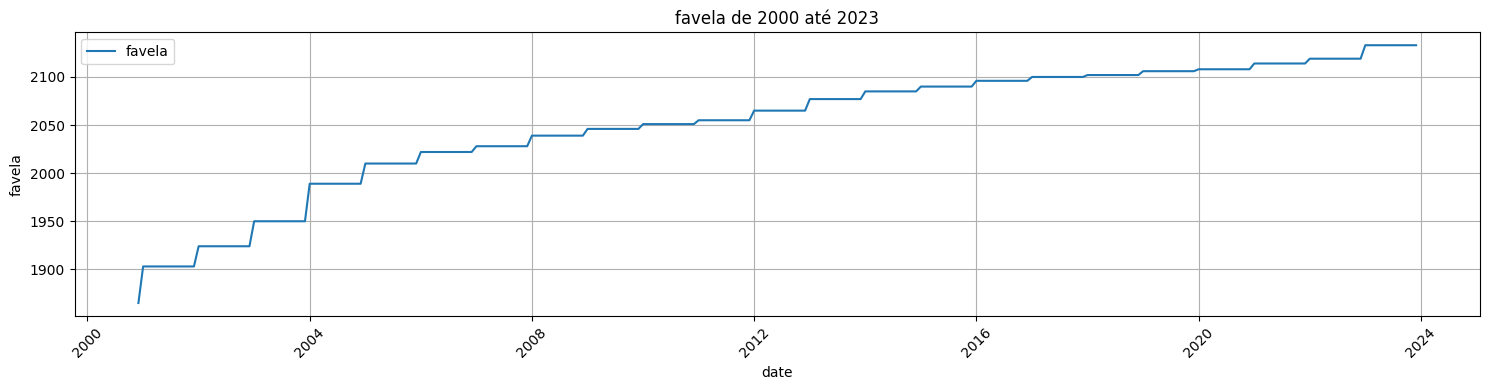

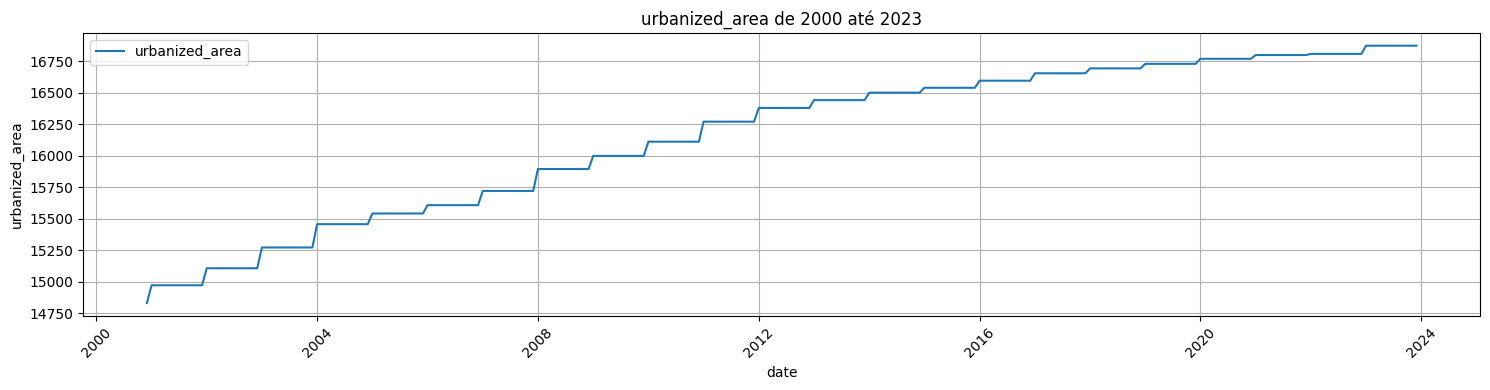

In [93]:
for feature in features_map_biomas:
    title = f"{feature} de 2000 até 2023"
    plot(dataset.index, dataset[feature], title, 'date', feature)

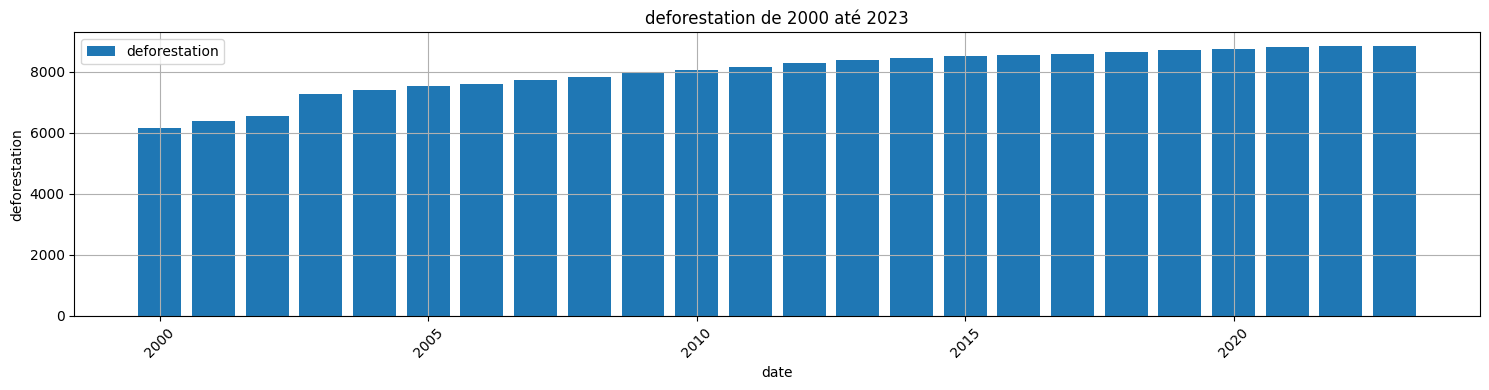

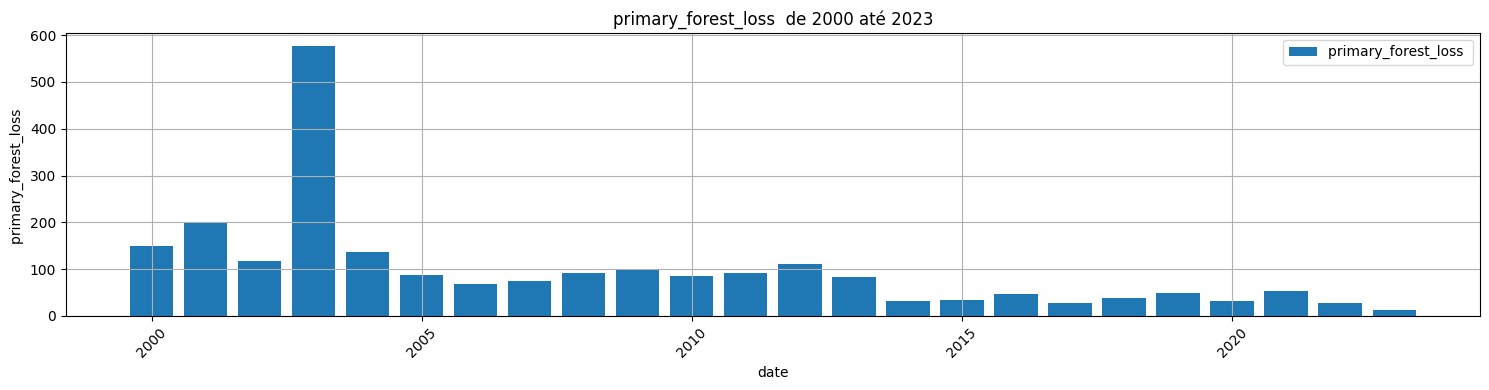

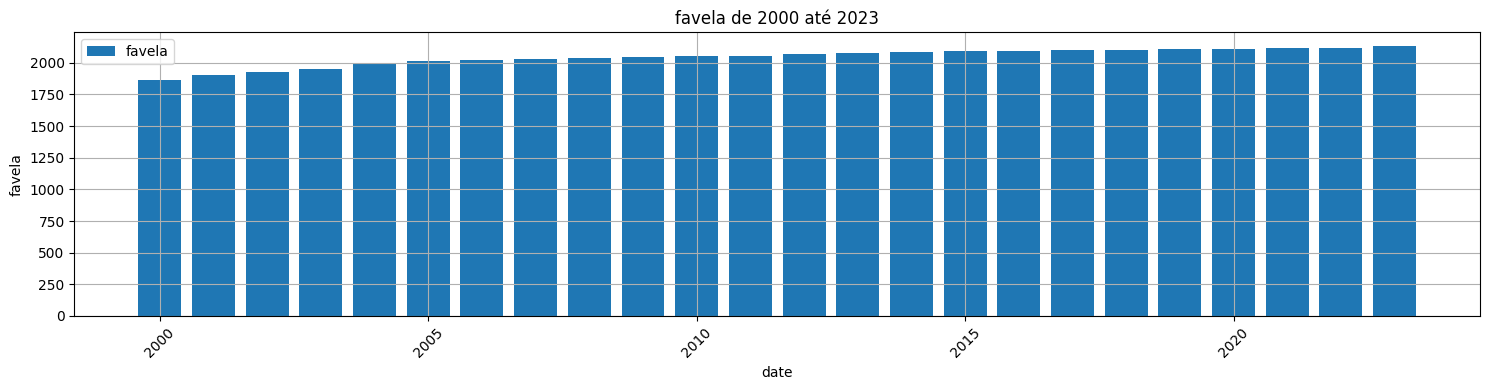

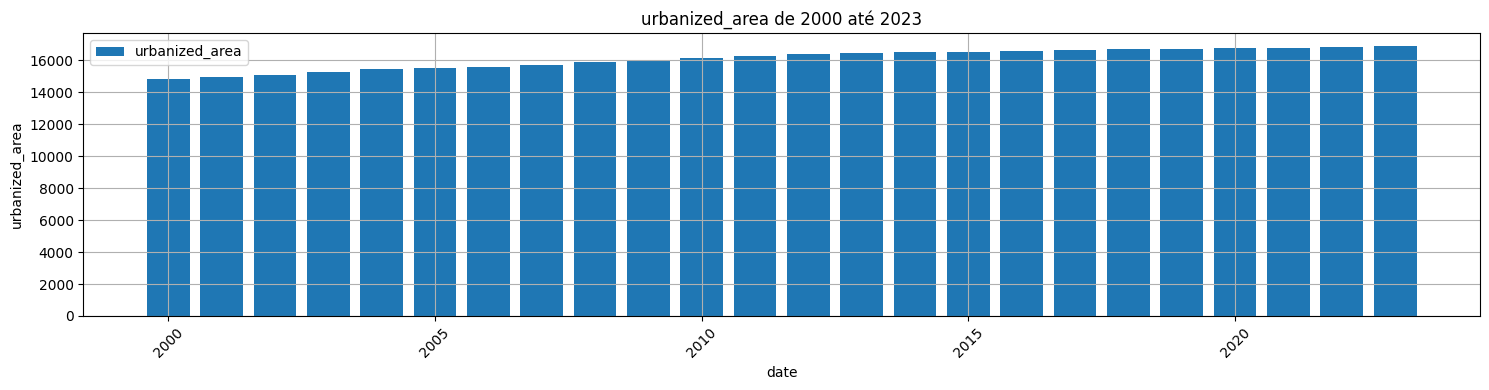

In [94]:
for feature in features_map_biomas:
    title = f"{feature} de 2000 até 2023"
    bar(anual_deforestation['date'], anual_deforestation[feature], title, 'date', feature)